Jeremy Gárate

#Airline Passenger Satisfaction - Analisis descriptivo e inferencial
### El conjunto de datos contiene una encuesta de satisfacción de los pasajeros de una aerolínea. La finalidad del presente trabajo es analisar descriptivamente el conjunto de datos en general, para despues hacerlo respecto a cada clase a predecir : insatisfecho-neutral, satisfechio. Finalmente se aplicaran las tecnicas de inferencia respectivas a la naturaleza de los datos.  


### Variables independientes o predictoras (int-float):



1. Age
2. Flight Distance
3. Inflight wifi service
4. Departure/Arrival time convenient
5. Ease of Online booking
6. Gate location
7. Food and drink
8. Online boarding
9. Seat comfort
10. Inflight entertainment
11. On-board service
12. Leg room service
13. Baggage handling
14. Checkin service
15. Inflight service
16. Cleanliness
17. Departure Delay in Minutes
18. Arrival Delay in Minutes

### Variable a predecir o dependiente
1. satisfaction (categorica)


### La variable satisfaccion es la respuesta final


       
     


In [ ]:
!pip install prince
!pip install gower
!pip install umap-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import prince

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import levene

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score, DistanceMetric

import gower
import umap



from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import plotnine as p9

In [ ]:
########################## FUNCIONES Y VARIABLES #######################



# Funcion que grafica el histograma normal y acumulado de una columana segmentada por una variable categorica
# Funcion que recibe un data frame, una columna, un string que alude a una categoria especifica que se desea visualizar por separado, un bool sobre el estilo del grafico
# pues devuelve los graficos xd
def hist2(df,columna,cat,solo_linea=True,titulo="grafico"):
  if solo_linea:
    fig, axes= plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data=df,x=columna,hue=cat,element="step", fill=False,ax=axes[0])

    sns.histplot(data=df,x=columna,hue=cat,element="step", fill=False,ax=axes[1],cumulative=True)
    fig.suptitle(titulo)
  elif solo_linea==False:
    fig, axes= plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data=df,x=columna,hue=cat, fill=True,ax=axes[0])

    sns.histplot(data=df,x=columna,hue=cat, fill=True,ax=axes[1],cumulative=True)
    fig.suptitle(titulo)



# Funcion que grafica un qqplot

def qqplot(data):
  sp.stats.probplot(data, dist="norm", plot=plt)
  plt.title("Quantile-Quantile Plot")
  plt.xlabel("Theoretical Quantiles")
  plt.ylabel("Sample Quantiles")
  plt.show()


# funcion para calcular normalidad
def Tnorm(data):
  print("------------------------- Test Shapiro-Wilk----------------------------")
  T,p=shapiro(data.sample(n=30))
  if p > 0.05:
    print(p,">0.05",", los datos siguen una distribucion normal")
  else:
    print(p,"<0.05",", los datos no siguen una distribucion normal")

  print("------------------------- Test D'Agostino's K^2------------------------")
  T,p=normaltest(data)
  if p > 0.05:
    print(p,">0.05",", los datos siguen una distribucion normal")
  else:
    print(p,"<0.05",", los datos no siguen una distribucion normal")


# fduncion para calcular la homocedasticidad
def Tvar(data1,data2):
  print("------------------------- Test Shapiro-Wilk----------------------------")
  T,p=levene(data1,data2)
  if p > 0.05:
    print(p,">0.05",", los datos son homocedasticos")
  else:
    print(p,"<0.05",", los datos son heterocedasticos")


# Funcion que realiza la U de man con n creciente para dos set de datos
def UmanXprop(data1,data2):
  ns=[30,100,1000,10000]
  for n in ns:
    print(f"--------------- N={n}------------------")
    stat, p = mannwhitneyu(data1.sample(n=5000), data2.sample(n=5000))
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
      print('Probably the same distribution')
    else:
      print('Probably different distributions')

# Funcion para diferencia de medias multiples no parametrico
def Tkrus(data1,data2,data3):
  stat, p = kruskal(data1, data2, data3)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably the same distribution')
  else:
    print('Probably different distributions')


def Keval(scores,  preds, labels, name='', X=None):

    if X is not None:

        silhouette = silhouette_score(X, preds, metric='euclidean')
        cal_har = calinski_harabasz_score(X, preds)
        dav_bould = davies_bouldin_score(X, preds)

        adj_mut_info = adjusted_mutual_info_score(labels, preds, average_method='arithmetic')
        adj_rand = adjusted_rand_score(labels, preds)

        content = {'Algorithm':name,
                   'Silhouette':silhouette,
                   'Calinski_Harabasz':cal_har,
                   'Davis Bouldin':dav_bould,
                   'Adjusted_Mutual_Info':adj_mut_info,
                   'Adjusted_Rand_Score':adj_rand}

        scores = scores.append(content, ignore_index = True)

    else:

        adj_mut_info = adjusted_mutual_info_score(labels, preds, average_method='arithmetic')
        adj_rand = adjusted_rand_score(labels, preds)

        content = {'Algorithm':name,
                   'Silhouette':np.NaN,
                   'Calinski_Harabasz':np.NaN,
                   'Davis Bouldin':np.NaN,
                   'Adjusted_Mutual_Info':adj_mut_info,
                   'Adjusted_Rand_Score':adj_rand}

        scores = scores.append(content, ignore_index = True)
    return scores

# cargar los datos y hechar un vistazo

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bases kaggle/train.csv")
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

eliminacion de datos nulos

In [ ]:
df.fillna(df.mean(),inplace=True)
df.info()

<ipython-input-7-9349ec48382f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# Analisis descriptivo general

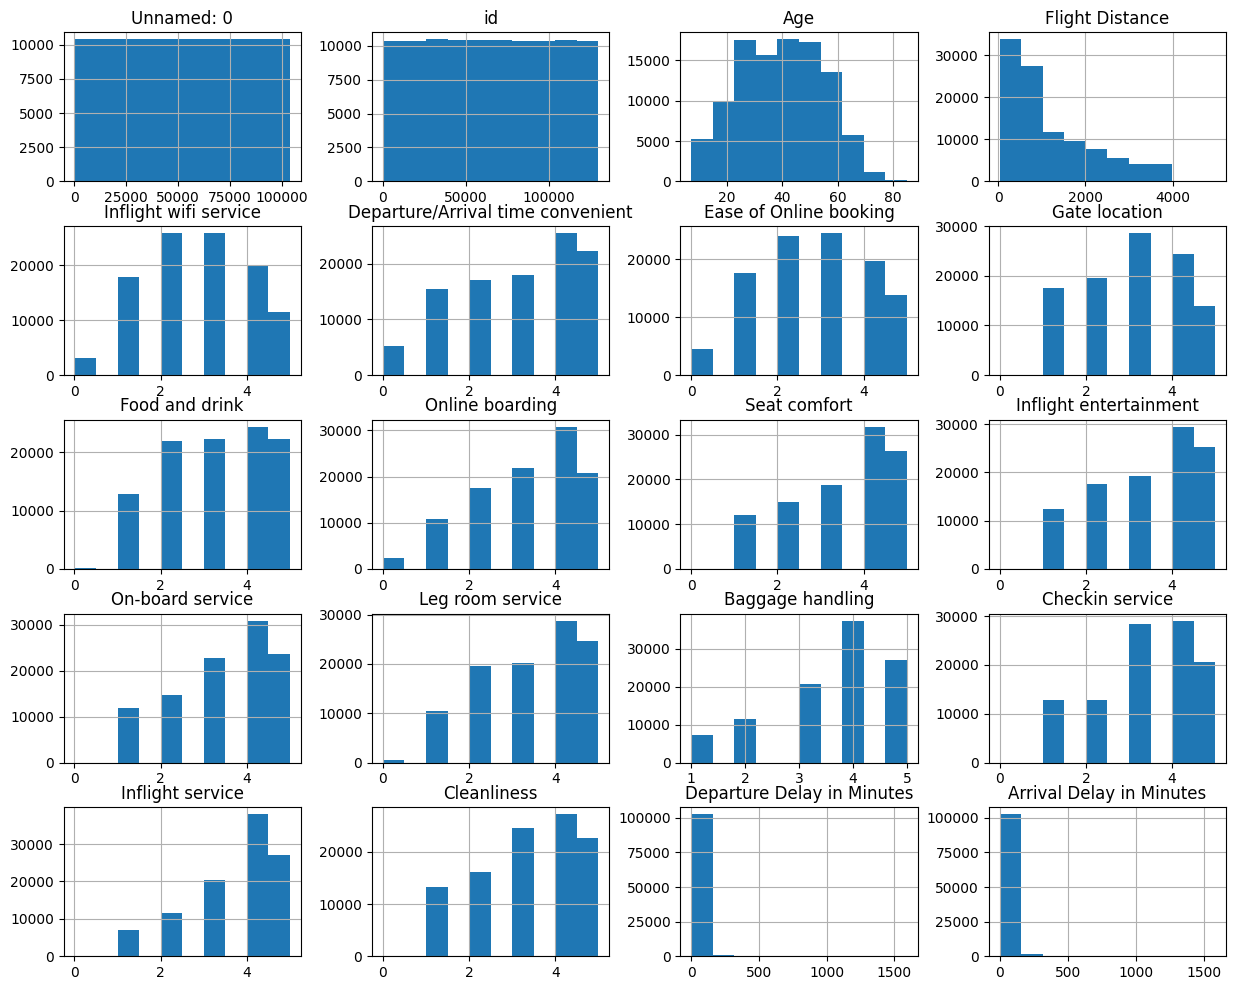

In [ ]:
df.hist(figsize=(15,12))
plt.show()

# varibles categoricas

In [ ]:
satisfaccion=df["satisfaction"].value_counts() # crar estructura para el grafico de barras
classe=df["Class"].value_counts()
sexo=df["Gender"].value_counts()
tipo_viaje=df["Type of Travel"].value_counts()
tipo_cliente=df["Customer Type"].value_counts()

<Axes: >

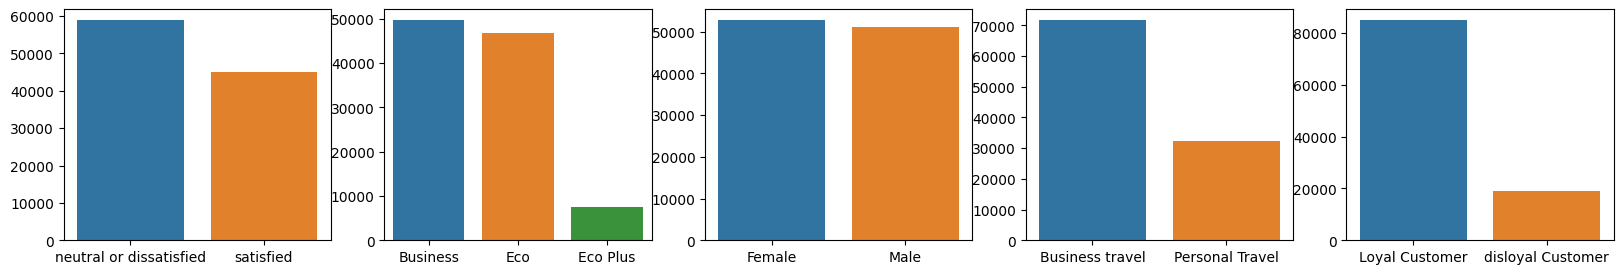

In [ ]:
fig, axes= plt.subplots(1,5, figsize=(20, 3))
sns.barplot(y=satisfaccion.values,x=satisfaccion.index,ax=axes[0])
sns.barplot(y=classe.values,x=classe.index,ax=axes[1])
sns.barplot(y=sexo.values,x=sexo.index,ax=axes[2])
sns.barplot(y=tipo_viaje.values,x=tipo_viaje.index,ax=axes[3])
sns.barplot(y=tipo_cliente.values,x=tipo_cliente.index,ax=axes[4])


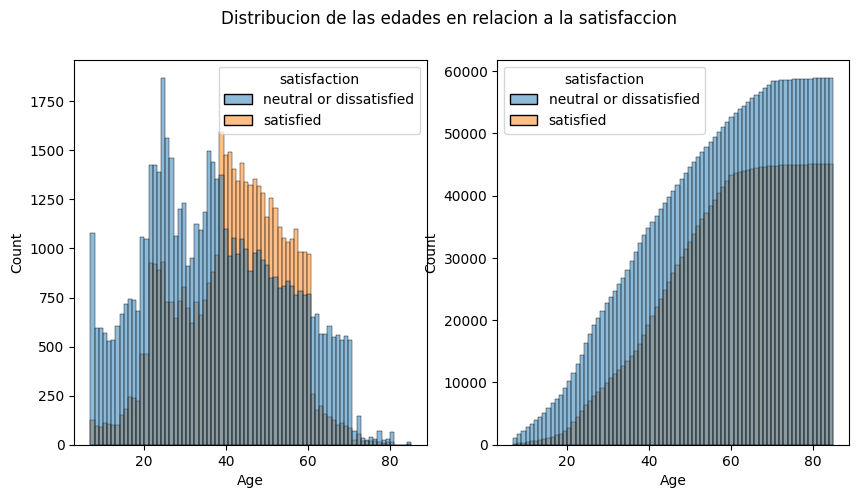

In [ ]:
hist2(df,df["Age"],"satisfaction",solo_linea=False,titulo="Distribucion de las edades en relacion a la satisfaccion")

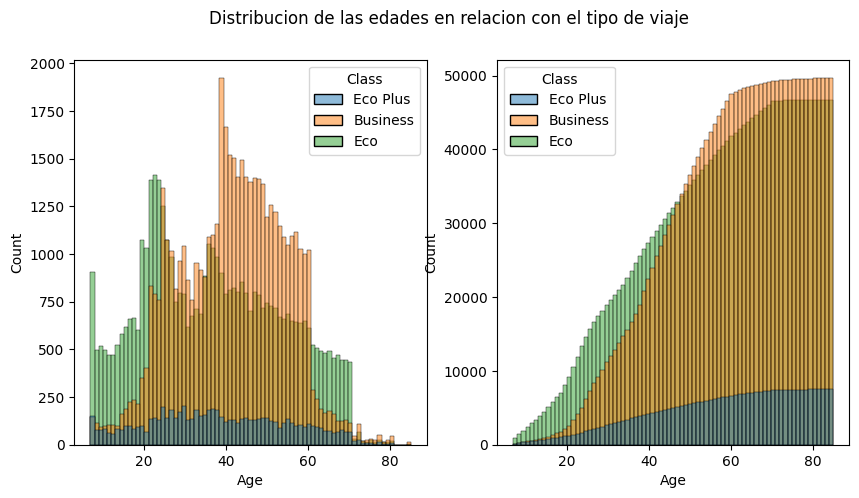

In [ ]:
hist2(df,df["Age"],"Class",solo_linea=False,titulo="Distribucion de las edades en relacion con el tipo de viaje")

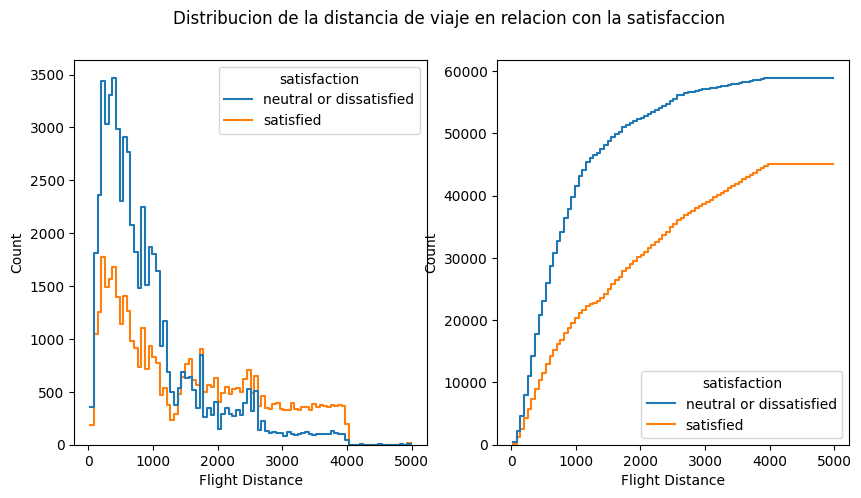

In [ ]:
hist2(df,df["Flight Distance"],"satisfaction",solo_linea=True,titulo="Distribucion de la distancia de viaje en relacion con la satisfaccion")

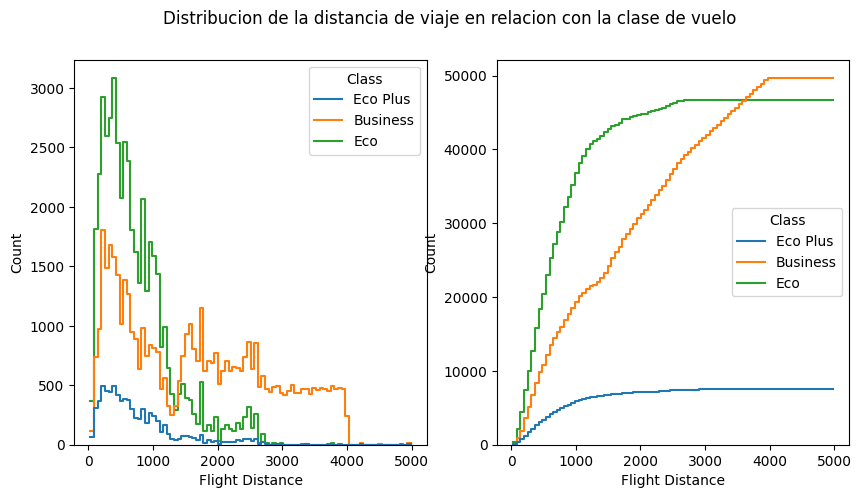

In [ ]:
hist2(df,df["Flight Distance"],"Class",solo_linea=True,titulo="Distribucion de la distancia de viaje en relacion con la clase de vuelo")

#analisis visual de correlaciones

<ipython-input-15-aeba2dbfedb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


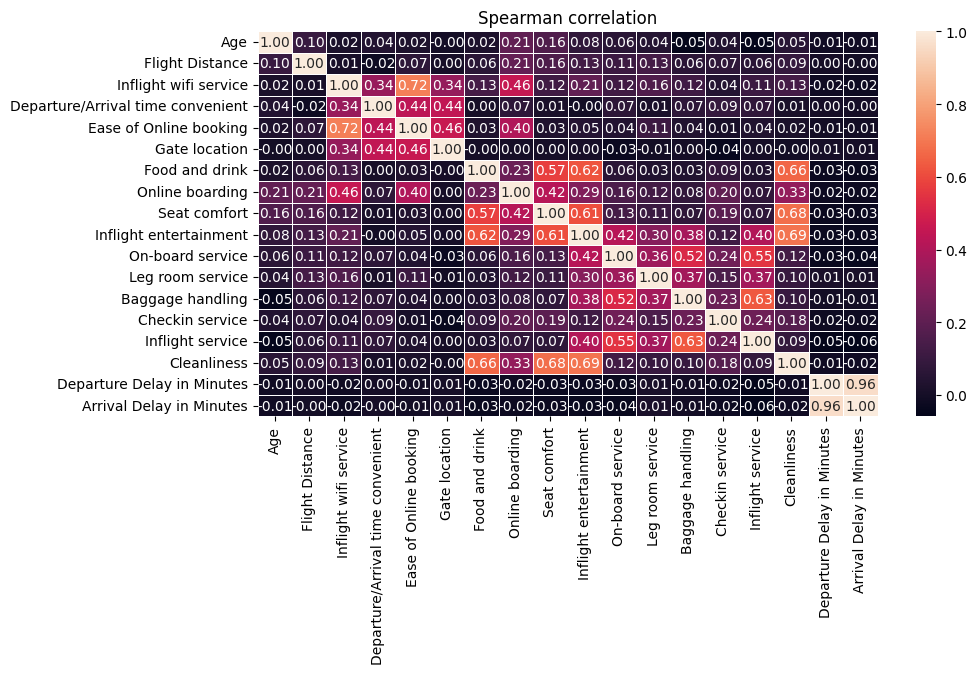

In [ ]:
dfc=df.iloc[:,2:].corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.cubehelix_palette(as_cmap=True)
sns.heatmap(dfc, annot=True, fmt='.2f', ax=ax, cbar=True, linewidths=0.5)
plt.title("Spearman correlation")
plt.show()

In [ ]:
import plotly.express as px

fig = px.imshow(dfc.round(2),text_auto=True,labels=dict(color="correlacion"))
fig.update_layout(
    width=800,  # Ancho en píxeles
    height=800,  # Alto en píxeles
    title="Matrix de correlaciones",
    title_x=0.5

)
fig.show()

# Inferencia estadistica respecto a la normalidad

respecto a la edad
$$H_{o}: edad\thicksim Normal$$
$$H_{1}: edad \neq\thicksim Normal$$


In [ ]:
Tnorm(df["Age"])

------------------------- Test Shapiro-Wilk----------------------------
0.8757835626602173 >0.05 , los datos siguen una distribucion normal
------------------------- Test D'Agostino's K^2------------------------
0.0 <0.05 , los datos no siguen una distribucion normal


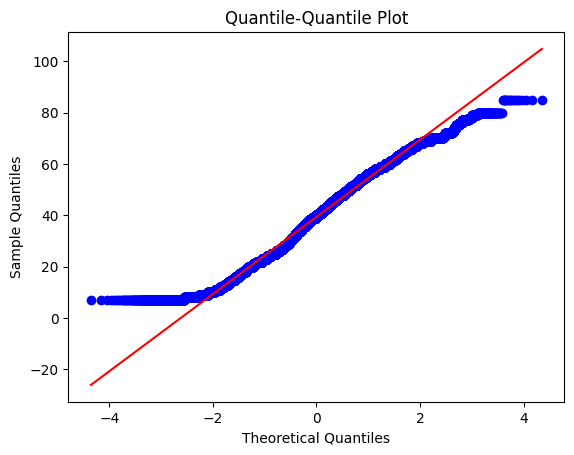

In [ ]:
qqplot(df["Age"])

respecto a la distancia de vuelo
$$H_{o}: distancia\thicksim Normal$$
$$H_{1}: distancia\thicksim Normal$$

In [ ]:
Tnorm(df["Flight Distance"])

------------------------- Test Shapiro-Wilk----------------------------
0.0022048417013138533 <0.05 , los datos no siguen una distribucion normal
------------------------- Test D'Agostino's K^2------------------------
0.0 <0.05 , los datos no siguen una distribucion normal


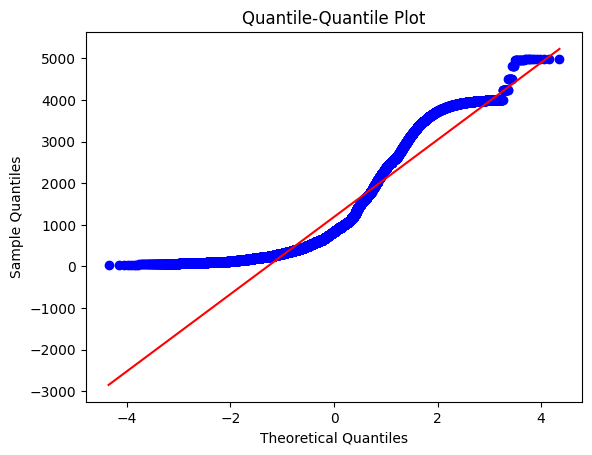

In [ ]:
qqplot(df["Flight Distance"])

# separar las variables respecto a la variable independiente

In [ ]:
dfs = df[df["satisfaction"]=="neutral or dissatisfied"].select_dtypes(include=['int', 'float']).reset_index() ### crea un data frame que solo tiene las variables numericas
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58879 entries, 0 to 58878
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              58879 non-null  int64  
 1   Unnamed: 0                         58879 non-null  int64  
 2   id                                 58879 non-null  int64  
 3   Age                                58879 non-null  int64  
 4   Flight Distance                    58879 non-null  int64  
 5   Inflight wifi service              58879 non-null  int64  
 6   Departure/Arrival time convenient  58879 non-null  int64  
 7   Ease of Online booking             58879 non-null  int64  
 8   Gate location                      58879 non-null  int64  
 9   Food and drink                     58879 non-null  int64  
 10  Online boarding                    58879 non-null  int64  
 11  Seat comfort                       58879 non-null  int

In [ ]:
dfi = df[df["satisfaction"]=="satisfied"].select_dtypes(include=['int', 'float']).reset_index()
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45025 entries, 0 to 45024
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              45025 non-null  int64  
 1   Unnamed: 0                         45025 non-null  int64  
 2   id                                 45025 non-null  int64  
 3   Age                                45025 non-null  int64  
 4   Flight Distance                    45025 non-null  int64  
 5   Inflight wifi service              45025 non-null  int64  
 6   Departure/Arrival time convenient  45025 non-null  int64  
 7   Ease of Online booking             45025 non-null  int64  
 8   Gate location                      45025 non-null  int64  
 9   Food and drink                     45025 non-null  int64  
 10  Online boarding                    45025 non-null  int64  
 11  Seat comfort                       45025 non-null  int

# inferencia sobre la varianza de ambos grupos

respecto a la edad:
$$H_{o}: =varianza$$
$$H_{1}: \neq varianza$$

In [ ]:
Tvar(dfi["Age"],dfs["Age"])

------------------------- Test Shapiro-Wilk----------------------------
0.0 <0.05 , los datos son heterocedasticos


respecto a la distancia de vuelo:
$$H_{o}: =varianza$$
$$H_{1}: \neq varianza$$

In [ ]:
Tvar(dfs["Flight Distance"], dfi["Flight Distance"])

------------------------- Test Shapiro-Wilk----------------------------
0.0 <0.05 , los datos son heterocedasticos


# inferencia sobre las edades de los grupos satisfechos y no satisfechos
dado que las edades no cumplen las condiciones parametricas, se procedera a analizar si existen diferencias entre ambos grupos empleando la alternativa no parametrica al t-test (test u de mann-whitney)

$$H_{o}: edades-iguales$$
$$H_{1}: edades-diferentes$$


In [ ]:
UmanXprop(dfs["Age"], dfi["Age"])

--------------- N=30------------------
stat=10154449.000, p=0.000
Probably different distributions
--------------- N=100------------------
stat=10287771.500, p=0.000
Probably different distributions
--------------- N=1000------------------
stat=10460054.500, p=0.000
Probably different distributions
--------------- N=10000------------------
stat=10422787.000, p=0.000
Probably different distributions


R: existen diferencias significativas entre las edades de la gente que sintio un viaje satisfactorio vs la gente que no

# inferencia sobre las distancias
dado que las distancias no cumplen las condiciones parametricas, se procedera a analizar si existen diferencias entre ambos grupos empleando la alternativa no parametrica al t-test (test u de mann-whitney)

$$H_{o}: distancias-iguales$$
$$H_{1}: distancias-diferentes$$


In [ ]:
UmanXprop(dfs["Flight Distance"], dfi["Flight Distance"])

--------------- N=30------------------
stat=8921627.500, p=0.000
Probably different distributions
--------------- N=100------------------
stat=8667275.500, p=0.000
Probably different distributions
--------------- N=1000------------------
stat=8877105.500, p=0.000
Probably different distributions
--------------- N=10000------------------
stat=8553937.500, p=0.000
Probably different distributions


R: existen diferencias significativas entre las distancias de los vuelos de la gente que sintio un viaje satisfactorio vs la gente que no

# respecto a la clase de vuelo

creacion de los tres grupos de datos respectivos

In [ ]:
dfep = df[df["Class"]=="Eco Plus"].select_dtypes(include=['int', 'float']).reset_index()
dfb = df[df["Class"]=="Business"].select_dtypes(include=['int', 'float']).reset_index()
dfe = df[df["Class"]=="Eco"].select_dtypes(include=['int', 'float']).reset_index()

# inferencia de la edad respecto a la clase de vuelo
$$H_{o}: edades-iguales$$
$$H_{1}: edades-diferentes$$


In [ ]:
Tkrus(dfep["Age"],dfb["Age"],dfe["Age"])

stat=2198.956, p=0.000
Probably different distributions


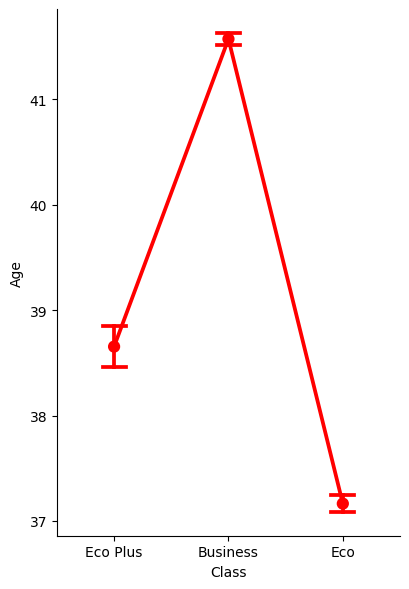

In [ ]:
sns.catplot(x="Class", y="Age", data=df,capsize=.2, errorbar="se",kind="point", height=6, aspect=.7,color="red")

In [ ]:
UmanXprop(dfep["Age"],dfe["Age"])

--------------- N=30------------------
stat=12992450.500, p=0.001
Probably different distributions
--------------- N=100------------------
stat=13039842.000, p=0.000
Probably different distributions
--------------- N=1000------------------
stat=12920131.000, p=0.004
Probably different distributions
--------------- N=10000------------------
stat=13271390.000, p=0.000
Probably different distributions


# inferencia de la distancia respecto a la clase de vuelo
$$H_{o}: distancias-iguales$$
$$H_{1}: distancias-diferentes$$

In [ ]:
Tkrus(dfep["Flight Distance"],dfb["Flight Distance"],dfe["Flight Distance"])

stat=17742.669, p=0.000
Probably different distributions


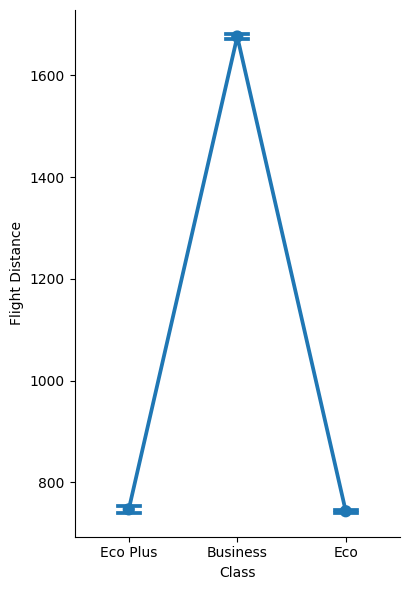

In [ ]:
sns.catplot(x="Class", y="Flight Distance", data=df,capsize=.2, errorbar="se",kind="point", height=6, aspect=.7)

In [ ]:
UmanXprop(dfep["Flight Distance"],dfe["Flight Distance"])

--------------- N=30------------------
stat=12104212.000, p=0.006
Probably different distributions
--------------- N=100------------------
stat=12277184.000, p=0.123
Probably the same distribution
--------------- N=1000------------------
stat=12376372.500, p=0.392
Probably the same distribution
--------------- N=10000------------------
stat=12228213.500, p=0.060
Probably the same distribution


# Reduccion de Dimensionalidad


### esntandarizacion de las variables numericas

# se aplica la siguiente estandarizacion de las variables numericas
$$z = \frac{x - u}{s}$$



In [ ]:
dfrd=df.drop(["id","Unnamed: 0"],axis=1) # sin variables relleno ni la clase final
labels=dfrd.pop("satisfaction")
from sklearn.preprocessing import StandardScaler

variablesNumericas=["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]
objetoScaler=StandardScaler()
dfrd[variablesNumericas]=objetoScaler.fit_transform(dfrd[variablesNumericas])

round(dfrd[variablesNumericas].describe(),2)
dfrd.info()
dfrd.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  float64
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  float64
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Gender      Customer Type       Age   Type of Travel     Class  \
0     Male     Loyal Customer -1.745279  Personal Travel  Eco Plus   
1     Male  disloyal Customer -0.951360  Business travel  Business   
2   Female     Loyal Customer -0.885200  Business travel  Business   
3   Female     Loyal Customer -0.951360  Business travel  Business   
4     Male     Loyal Customer  1.430397  Business travel  Business   
..     ...                ...       ...              ...       ...   
95  Female     Loyal Customer -0.488241  Business travel       Eco   
96  Female     Loyal Customer -0.025121  Personal Travel       Eco   
97    Male     Loyal Customer -1.348320  Personal Travel  Business   
98  Female     Loyal Customer -1.612959  Personal Travel  Eco Plus   
99  Female  disloyal Customer  0.173358  Business travel  Business   

    Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0         -0.731539                      3                                  4   
1         -0.957184                      3                                  2   
2         -0.047584                      2                                  2   
3         -0.629246                      2                                  5   
4         -0.978244                      3                                  3   
..              ...                    ...                                ...   
95        -0.147871                      4                                  1   
96         0.585224                      4                                  5   
97        -0.849877                      3                                  1   
98        -0.895006                      1                                  5   
99        -0.307327                      3                                  3   

    Ease of Online booking  Gate location  ...  Seat comfort  \
0                        3              1  ...             5   
1                        3              3  ...             1   
2                        2              2  ...             5   
3                        5              5  ...             2   
4                        3              3  ...             5   
..                     ...            ...  ...           ...   
95                       1              1  ...             4   
96                       4              5  ...             5   
97                       3              2  ...             3   
98                       1              3  ...             5   
99                       3              3  ...             4   

    Inflight entertainment  On-board service  Leg room service  \
0                        5                 4                 3   
1                        1                 1                 5   
2                        5                 4                 3   
3                        2                 2                 5   
4                        3                 3                 4   
..                     ...               ...               ...   
95                       4                 4                 3   
96                       5                 2                 2   
97                       3                 2                 1   
98                       5                 5                 1   
99                       3                 5                 2   

    Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                  4                4                 5            5   
1                  3                1                 4            1   
2                  4                4                 4            5   
3                  3                1                 4            2   
4                  4                3                 3            3   
..               ...              ...               ...          ...   
95                 1                5                 2            4   
96                 3                3               

In [ ]:
columnas=list(dfrd.drop(["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"],axis=1).columns)
for n in columnas:
    dfrd[n] = dfrd[n].astype('str')
dfrd2=dfrd.sample(5000)

# FAMD

In [ ]:
famd = prince.FAMD(
    n_components=20,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",


)
famd = famd.fit(dfrd2)

famd.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0             38.001         6.08%                      6.08%
1             28.883         4.62%                     10.70%
2             27.554         4.41%                     15.11%
3             25.895         4.14%                     19.25%
4             24.367         3.90%                     23.15%
5             23.443         3.75%                     26.90%
6             22.534         3.61%                     30.51%
7             22.038         3.53%                     34.03%
8             21.808         3.49%                     37.52%
9             20.853         3.34%                     40.86%
10            19.971         3.20%                     44.06%
11            18.547         2.97%                     47.02%
12            17.736         2.84%                     49.86%
13            16.425         2.63%                     52.49%
14            15.609         2.50%                     54.99%
15            12.160         1.95%                     56.93%
16            10.926         1.75%                     58.68%
17            10.139         1.62%                     60.30%
18             9.732         1.56%                     61.86%
19             9.283         1.49%                     63.34%

In [ ]:
componentes=famd.row_coordinates(dfrd2)

In [ ]:
componentes_col=famd.column_coordinates_

In [ ]:
famd.plot(
    dfrd2,
    x_component=0,
    y_component=1
)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
(
    famd.row_contributions_
    .sort_values(0, ascending=False)
    .head(7)
    .style.format('{:.3%}')
)

In [ ]:
famd.column_contributions_.style.format('{:.0%}')

In [ ]:
summary_famd = famd.eigenvalues_summary
# Quita el signo de porcentaje y convierte a flotante
summary_famd['% of variance'] = summary_famd['% of variance'].str.rstrip('%').astype('float') / 100.0
summary_famd['% of variance (cumulative)'] = summary_famd['% of variance (cumulative)'].str.rstrip('%').astype('float') / 100.0
summary_famd

eigenvalue  % of variance  % of variance (cumulative)
component                                                      
0             38.001         0.0608                      0.0608
1             28.883         0.0462                      0.1070
2             27.554         0.0441                      0.1511
3             25.895         0.0414                      0.1925
4             24.367         0.0390                      0.2315
5             23.443         0.0375                      0.2690
6             22.534         0.0361                      0.3051
7             22.038         0.0353                      0.3403
8             21.808         0.0349                      0.3752
9             20.853         0.0334                      0.4086
10            19.971         0.0320                      0.4406
11            18.547         0.0297                      0.4702
12            17.736         0.0284                      0.4986
13            16.425         0.0263                      0.5249
14            15.609         0.0250                      0.5499
15            12.160         0.0195                      0.5693
16            10.926         0.0175                      0.5868
17            10.139         0.0162                      0.6030
18             9.732         0.0156                      0.6186
19             9.283         0.0149                      0.6334

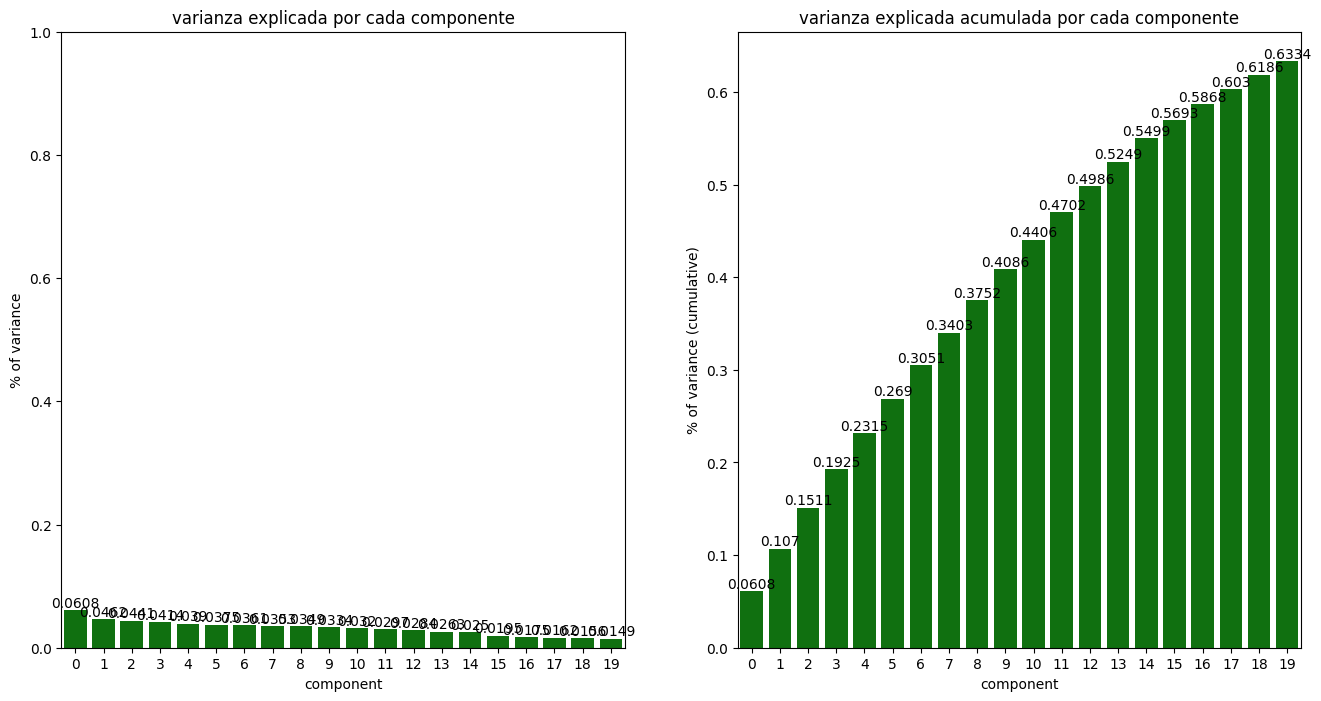

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.barplot(y=summary_famd["% of variance"],x=summary_famd["eigenvalue"].index,color="green",ax=axes[0])
axes[0].bar_label(axes[0].containers[0], fontsize=10)
axes[0].set_title('varianza explicada por cada componente')
axes[0].set_ylim(0,1)

sns.barplot(y=summary_famd["% of variance (cumulative)"],x=summary_famd["eigenvalue"].index,color="green",ax=axes[1])
axes[1].bar_label(axes[1].containers[0], fontsize=10)
axes[1].set_title('varianza explicada acumulada por cada componente')
plt.show()


In [ ]:
FAMD_R = famd.transform(dfrd2)

# Numero de clausters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

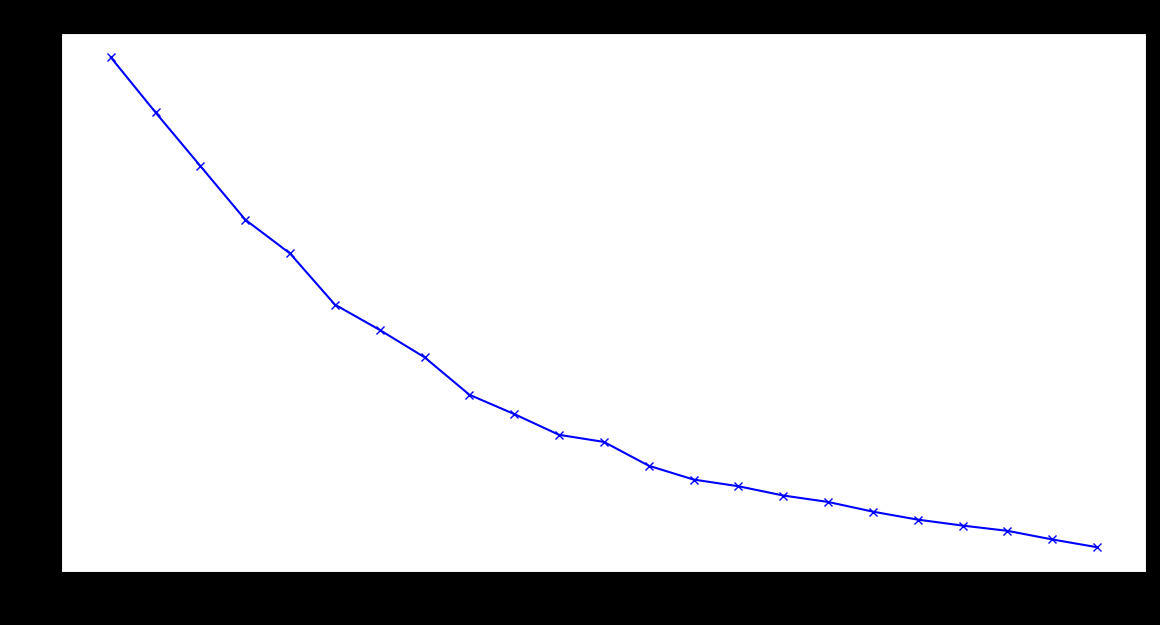

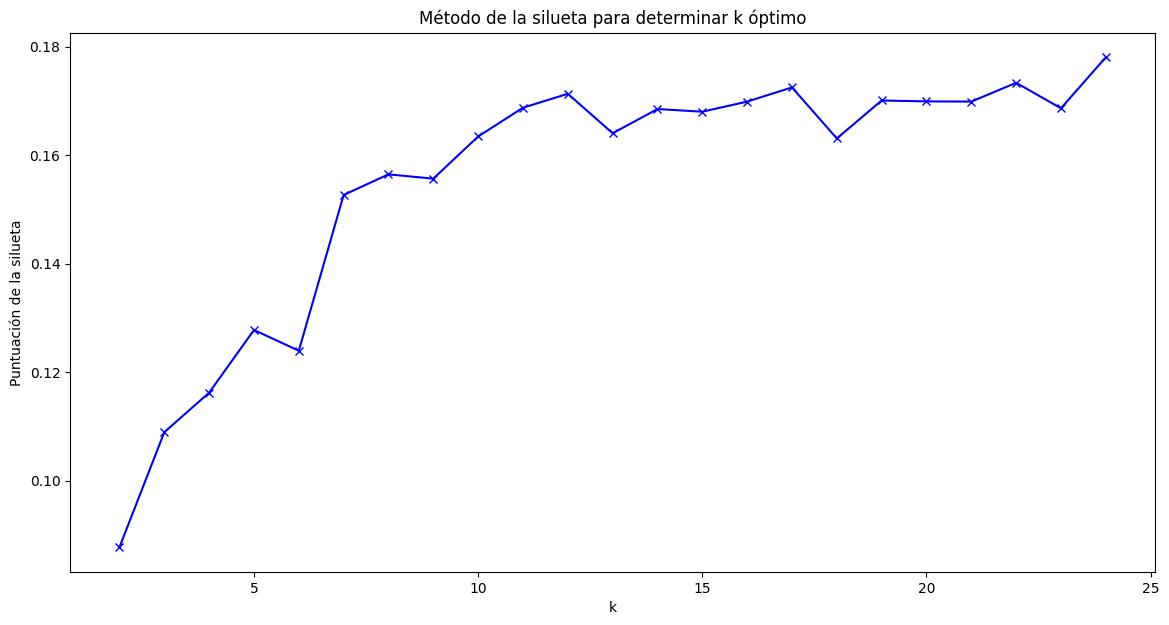

In [ ]:
sse = []
silhouette = []

# Definir el rango de número de clusters a probar
k_values = list(range(2, 25))  # Ajustar según el conjunto de datos

# Iterar sobre los posibles números de clusters y calcular la SSE y la puntuación de la silueta
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(FAMD_R)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(FAMD_R, kmeans.labels_))

# Método del codo
plt.figure(figsize=(14,7),facecolor='black')
plt.plot(k_values, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo para determinar k óptimo')
plt.show()
fig.patch.set_facecolor('black')

# Método de la silueta
plt.figure(figsize=(14,7))
plt.plot(k_values, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Puntuación de la silueta')
plt.title('Método de la silueta para determinar k óptimo')
plt.show()
fig.patch.set_facecolor('black')


# Agrupamiento Gaussiano

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
labels0 = gmm.fit_predict(FAMD_R.iloc[:, :])

# Asignar colores a cada punto según si el pasajero sobrevivió o no y el grupo obtenido por el agrupamiento
colors = np.where(df["satisfaction"] == 'satisfied', 'blue', 'red')

# Gráfico 3D con marcadores para 'alive' y grupos obtenidos
fig3d = go.Figure(data=[
    go.Scatter3d(x=FAMD_R.iloc[:, 0], y=FAMD_R.iloc[:, 1], z=FAMD_R.iloc[:, 2], mode='markers',
                 marker=dict(color=colors, size=5),
                 name='satisfaction'),
    go.Scatter3d(x=FAMD_R.iloc[:, 0], y=FAMD_R.iloc[:, 1], z=FAMD_R.iloc[:, 2], mode='markers',
                 marker=dict(color=labels0, size=5, colorscale='thermal'),
                 name='grupos')
])
fig3d.update_layout(scene=dict(xaxis_title='Component 1', yaxis_title='Component 2', zaxis_title='Component 3'),
                    title='Gaussian')
fig3d.show()

In [ ]:
x=pd.DataFrame()

# Agrupamiento por Kmeans

In [ ]:
FAMD_clusterer = KMeans(n_clusters=4, init='k-means++',
                        verbose=0, random_state=42,
                        algorithm='lloyd').fit(famd.row_coordinates(dfrd2))

dfrd2["preds"] = FAMD_clusterer.labels_

dfrd2['target'] = labels



colors = np.where(df["satisfaction"] == 'satisfied', 'blue', 'red')


fig3d = go.Figure(data=[
    go.Scatter3d(x=FAMD_R.iloc[:, 0], y=FAMD_R.iloc[:, 1], z=FAMD_R.iloc[:, 2], mode='markers',
                 marker=dict(color=colors, size=5),
                 name='satisfaction'),
    go.Scatter3d(x=FAMD_R.iloc[:, 0], y=FAMD_R.iloc[:, 1], z=FAMD_R.iloc[:, 2], mode='markers',
                 marker=dict(color=dfrd2['preds'], size=5, colorscale='thermal'),
                 name='grupos')
])
fig3d.update_layout(scene=dict(xaxis_title='Component 1', yaxis_title='Component 2', zaxis_title='Component 3'),
                    title='K-means')
fig3d.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:

scores=Keval(x,dfrd2["preds"].values,dfrd2["target"].values,name="Kmeans-FAMD",X=componentes)
scores

<ipython-input-4-558bea8d1a8a>:101: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Algorithm  Silhouette  Calinski_Harabasz  Davis Bouldin  \
0  Kmeans-FAMD    0.116218         385.874537       2.555596   

   Adjusted_Mutual_Info  Adjusted_Rand_Score  
0              0.073815             0.039973

#Gower y UMAP

In [ ]:
gower_data = dfrd2.copy()
gower_distance_matrix = gower.gower_matrix(gower_data)
umap_embeddings = umap.UMAP(random_state=42, n_components=2).fit_transform(gower_distance_matrix)

gower_data['x'] = umap_embeddings[:,0]
gower_data['y'] = umap_embeddings[:,1]

gower_data['target'] = labels

gower_data

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Gender      Customer Type       Age   Type of Travel     Class  \
59529   Female     Loyal Customer -0.422081  Business travel  Business   
80522   Female     Loyal Customer -1.017520  Personal Travel  Eco Plus   
35468   Female     Loyal Customer  1.761197  Business travel       Eco   
19252   Female     Loyal Customer  0.371838  Business travel       Eco   
18384     Male     Loyal Customer  1.364237  Personal Travel       Eco   
...        ...                ...       ...              ...       ...   
102338    Male     Loyal Customer -0.554401  Business travel  Business   
39300     Male     Loyal Customer  1.099597  Business travel  Business   
91936   Female     Loyal Customer  0.768798  Business travel       Eco   
88172     Male     Loyal Customer  0.239518  Business travel  Business   
14933     Male  disloyal Customer -1.216000  Business travel       Eco   

        Flight Distance Inflight wifi service  \
59529          2.321184                     2   
80522         -0.510908                     3   
35468         -0.597155                     3   
19252         -0.663344                     2   
18384         -1.010335                     3   
...                 ...                   ...   
102338         0.211155                     3   
39300          1.403562                     3   
91936         -0.761625                     5   
88172          0.917172                     5   
14933         -0.388559                     1   

       Departure/Arrival time convenient Ease of Online booking Gate location  \
59529                                  5                      5             5   
80522                                  4                      3             3   
35468                                  1                      5             5   
19252                                  5                      5             5   
18384                                  3                      3             4   
...                                  ...                    ...           ...   
102338                                 3                      3             3   
39300                                  3                      3             3   
91936                                  4                      4             4   
88172                                  5                      4             5   
14933                                  1                      1             4   

        ... Baggage handling Checkin service Inflight service Cleanliness  \
59529   ...                2               4                2           4   
80522   ...                5               5                4           1   
35468   ...                3               3                3           1   
19252   ...                2               2                2           3   
18384   ...                1               4                4           2   
...     ...              ...             ...              ...         ...   
102338  ...                4               3                5           3   
39300   ...                3               3                3           3   
91936   ...                5               1                5           3   
88172   ...                5               4                5           3   
14933   ...                5               3                4           2   

       Departure Delay in Minutes Arrival Delay in Minutes preds  \
59529                    0.266393                -0.030504     3   
80522                    0.580276                -0.159901     2   
35468                    1.208044                 0.901156     1   
19252                   -0.387532                -0.392816     3   
18384                   -0.387532                -0.392816     3   
...                           ...                      ...   ...   
102338                  -0.387532                -0.392816     1   
39300                   -0.387532                -0.392816     1   
91936               

In [ ]:
pd.DataFrame(gower_distance_matrix)

0         1         2         3         4         5         6     \
0     0.000000  0.709887  0.614796  0.283201  0.585792  0.584159  0.558606   
1     0.709887  0.000000  0.539977  0.653446  0.539370  0.663190  0.520782   
2     0.614796  0.539977  0.000000  0.461206  0.581105  0.537699  0.574648   
3     0.283201  0.653446  0.461206  0.000000  0.510924  0.511721  0.711775   
4     0.585792  0.539370  0.581105  0.510924  0.000000  0.543406  0.639365   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.631633  0.609080  0.530467  0.625927  0.636851  0.595981  0.385306   
4996  0.591180  0.590772  0.360450  0.675995  0.508501  0.550964  0.366998   
4997  0.744979  0.629112  0.652685  0.629615  0.715813  0.715439  0.535834   
4998  0.602206  0.760302  0.668869  0.555996  0.691920  0.651050  0.536529   
4999  0.655896  0.643578  0.558555  0.515126  0.484383  0.401847  0.696649   

          7         8         9     ...      4990      4991      4992  \
0     0.781973  0.507684  0.597096  ...  0.703005  0.567613  0.553252   
1     0.573158  0.626384  0.661779  ...  0.676328  0.701746  0.690667   
2     0.708910  0.607201  0.604534  ...  0.713100  0.515917  0.717823   
3     0.720245  0.547900  0.663669  ...  0.726388  0.701078  0.692556   
4     0.606169  0.760747  0.669252  ...  0.653979  0.657068  0.740874   
...        ...       ...       ...  ...       ...       ...       ...   
4995  0.608673  0.478597  0.552700  ...  0.526743  0.479783  0.539920   
4996  0.632032  0.633591  0.553993  ...  0.603812  0.355706  0.690706   
4997  0.599861  0.572711  0.607387  ...  0.591668  0.642079  0.401232   
4998  0.607118  0.480152  0.522668  ...  0.489837  0.534852  0.388698   
4999  0.711547  0.766748  0.632518  ...  0.606561  0.716204  0.744738   

          4993      4994      4995      4996      4997      4998      4999  
0     0.444380  0.506368  0.631633  0.591180  0.744979  0.602206  0.655896  
1     0.620180  0.763264  0.609080  0.590772  0.629112  0.760302  0.643578  
2     0.509137  0.648670  0.530467  0.360450  0.652685  0.668869  0.558555  
3     0.454728  0.580432  0.625927  0.675995  0.629615  0.555996  0.515126  
4     0.488635  0.674689  0.636851  0.508501  0.715813  0.691920  0.484383  
...        ...       ...       ...       ...       ...       ...       ...  
4995  0.691766  0.537838  0.000000  0.315026  0.616653  0.484556  0.579818  
4996  0.605083  0.624522  0.315026  0.000000  0.701978  0.608248  0.644844  
4997  0.644739  0.583876  0.616653  0.701978  0.000000  0.352278  0.644741  
4998  0.580168  0.399436  0.484556  0.608248  0.352278  0.000000  0.647707  
4999  0.594854  0.652913  0.579818  0.644844  0.644741  0.647707  0.000000  

[5000 rows x 5000 columns]

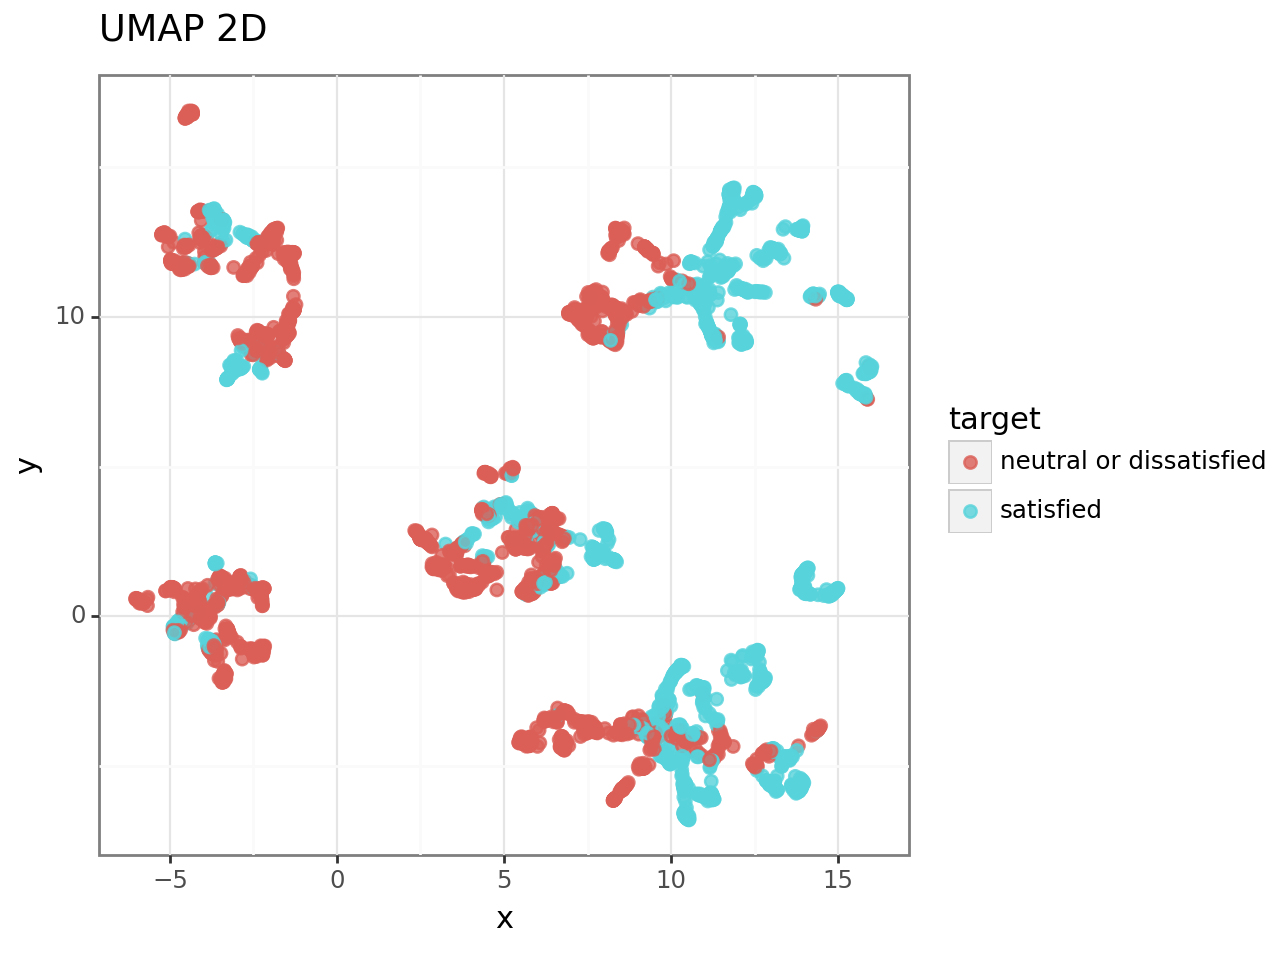

<Figure Size: (640 x 480)>

In [ ]:
(p9.ggplot(gower_data, p9.aes(x='x', y='y', fill='target', color='target'))
    + p9.geom_point(alpha=0.8, size=2)
    + p9.ggtitle('UMAP 2D')
    + p9.theme_bw())

In [ ]:
gower_clusterer = KMeans(n_clusters=4,
                            init='k-means++',
                           max_iter=300, random_state=42).fit(gower_distance_matrix)


gower_data["preds"] = gower_clusterer.labels_
gower_data["preds"] = gower_data["preds"].apply(str)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



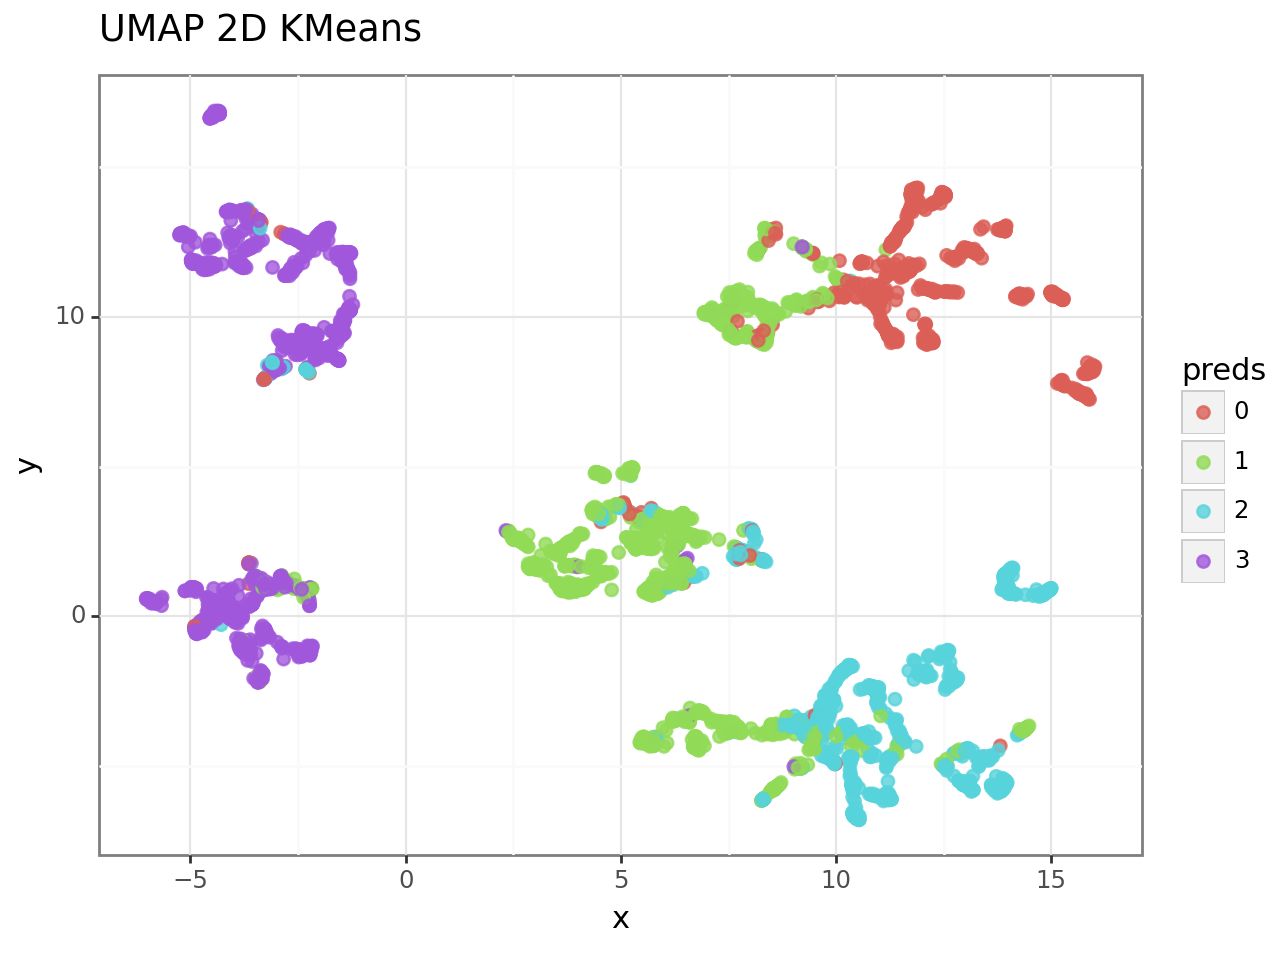

<Figure Size: (640 x 480)>

In [ ]:
(p9.ggplot(gower_data, p9.aes(x='x', y='y', fill='preds', color='preds'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('UMAP 2D KMeans')
      + p9.theme_bw())

### CLASIFICACION

In [ ]:
df=df.drop(["Unnamed: 0","id"],axis=1)
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# codificacion de variables categoricas

In [ ]:
todasc=list(df.columns)
nostr=["Age",'Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
for n in nostr:
  todac=todasc.remove(n)
strvar=todasc

In [ ]:
for n in strvar:
    df[n] = df[n].astype('str')

In [ ]:
df_encoded = pd.get_dummies(df, columns=strvar, drop_first=True)

# estandarizacion variables numericas

In [ ]:
scaler = StandardScaler()
df_encoded[nostr] = scaler.fit_transform(df_encoded[nostr])

In [ ]:
round(df_encoded[nostr].describe(),2)

Age  Flight Distance  Departure Delay in Minutes  \
count  103904.00        103904.00                   103904.00   
mean        0.00             0.00                       -0.00   
std         1.00             1.00                        1.00   
min        -2.14            -1.16                       -0.39   
25%        -0.82            -0.78                       -0.39   
50%         0.04            -0.35                       -0.39   
75%         0.77             0.56                       -0.07   
max         3.02             3.80                       41.25   

       Arrival Delay in Minutes  
count                 103904.00  
mean                      -0.00  
std                        1.00  
min                       -0.39  
25%                       -0.39  
50%                       -0.39  
75%                       -0.06  
max                       40.60

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Age                                  103904 non-null  float64
 1   Flight Distance                      103904 non-null  float64
 2   Departure Delay in Minutes           103904 non-null  float64
 3   Arrival Delay in Minutes             103904 non-null  float64
 4   Gender_Male                          103904 non-null  uint8  
 5   Customer Type_disloyal Customer      103904 non-null  uint8  
 6   Type of Travel_Personal Travel       103904 non-null  uint8  
 7   Class_Eco                            103904 non-null  uint8  
 8   Class_Eco Plus                       103904 non-null  uint8  
 9   Inflight wifi service_1              103904 non-null  uint8  
 10  Inflight wifi service_2              103904 non-null  uint8  
 11  Inflight wifi

In [ ]:
df_encoded["satisfaction_satisfied"]

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction_satisfied, Length: 103904, dtype: uint8

# variables

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x=df_encoded.drop("satisfaction_satisfied",axis=1)
y=df_encoded["satisfaction_satisfied"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
cv = StratifiedKFold(n_splits=10)

# clasificador bayesiano

In [ ]:
gnb = GaussianNB()

best_model = None
best_threshold = None
best_accuracy = 0

Fold 1 - Accuracy en validación: 0.8599783471670877, Accuracy en test: 0.8582358885520427
Fold 2 - Accuracy en validación: 0.8702032960423434, Accuracy en test: 0.8604013281362783
Fold 3 - Accuracy en validación: 0.8647900878142668, Accuracy en test: 0.8605456907752274
Fold 4 - Accuracy en validación: 0.8562319538017324, Accuracy en test: 0.8553005148934123
Fold 5 - Accuracy en validación: 0.8634504331087585, Accuracy en test: 0.860449449015928
Fold 6 - Accuracy en validación: 0.8639316650625601, Accuracy en test: 0.8623261633222655
Fold 7 - Accuracy en validación: 0.8660972088546679, Accuracy en test: 0.8604975698955777
Fold 8 - Accuracy en validación: 0.865255052935515, Accuracy en test: 0.8585246138299408
Fold 9 - Accuracy en validación: 0.8623676612127045, Accuracy en test: 0.8576584379962465
Fold 10 - Accuracy en validación: 0.8589990375360924, Accuracy en test: 0.8549636687358645
Mejor modelo - Accuracy en test: 0.8623261633222655, Umbral: 0.10965656787378412


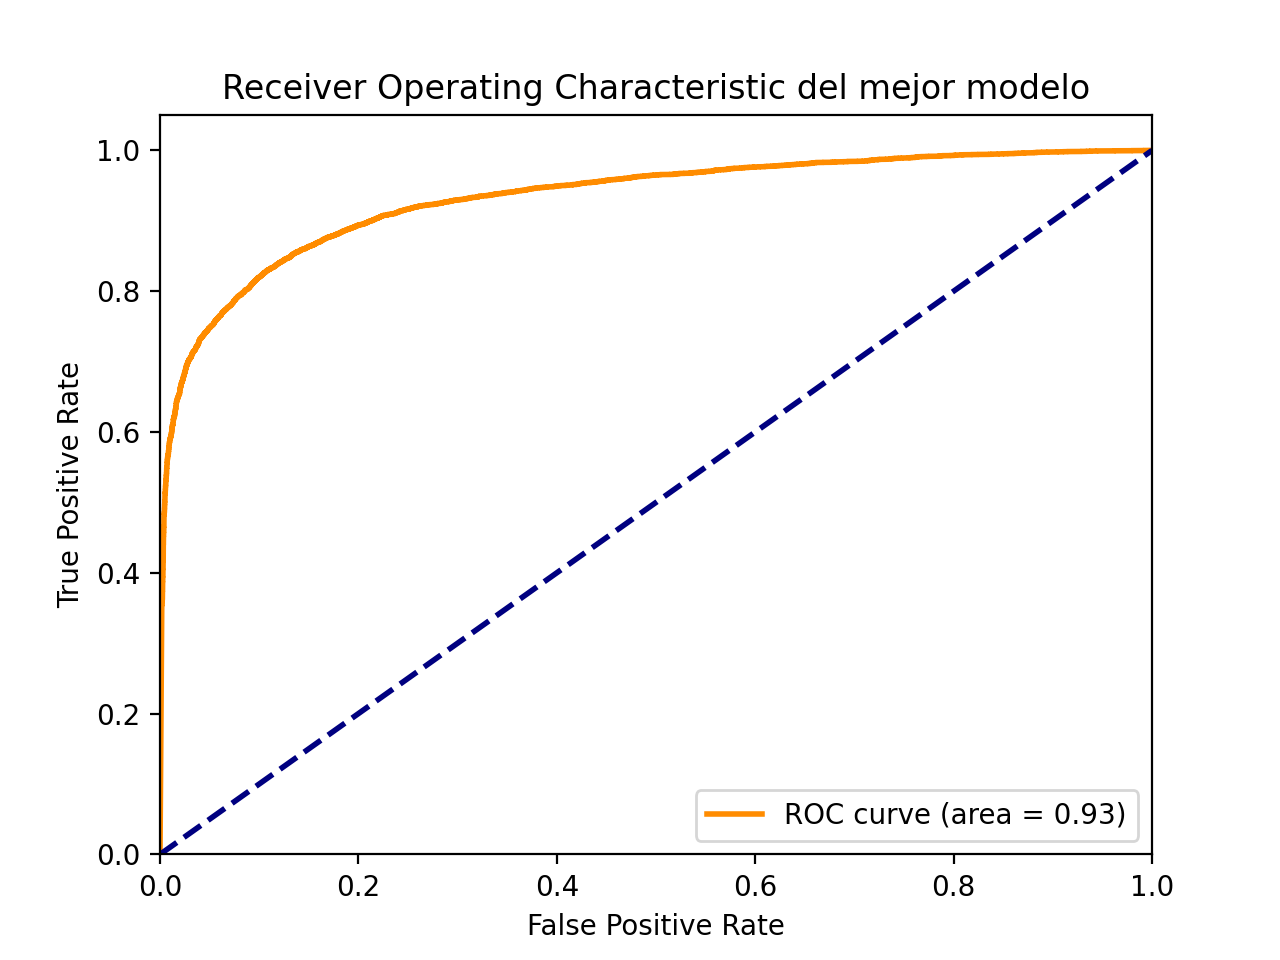

Mejor umbral: 0.10965656787378412

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[10284  1429]
 [ 1435  7633]]


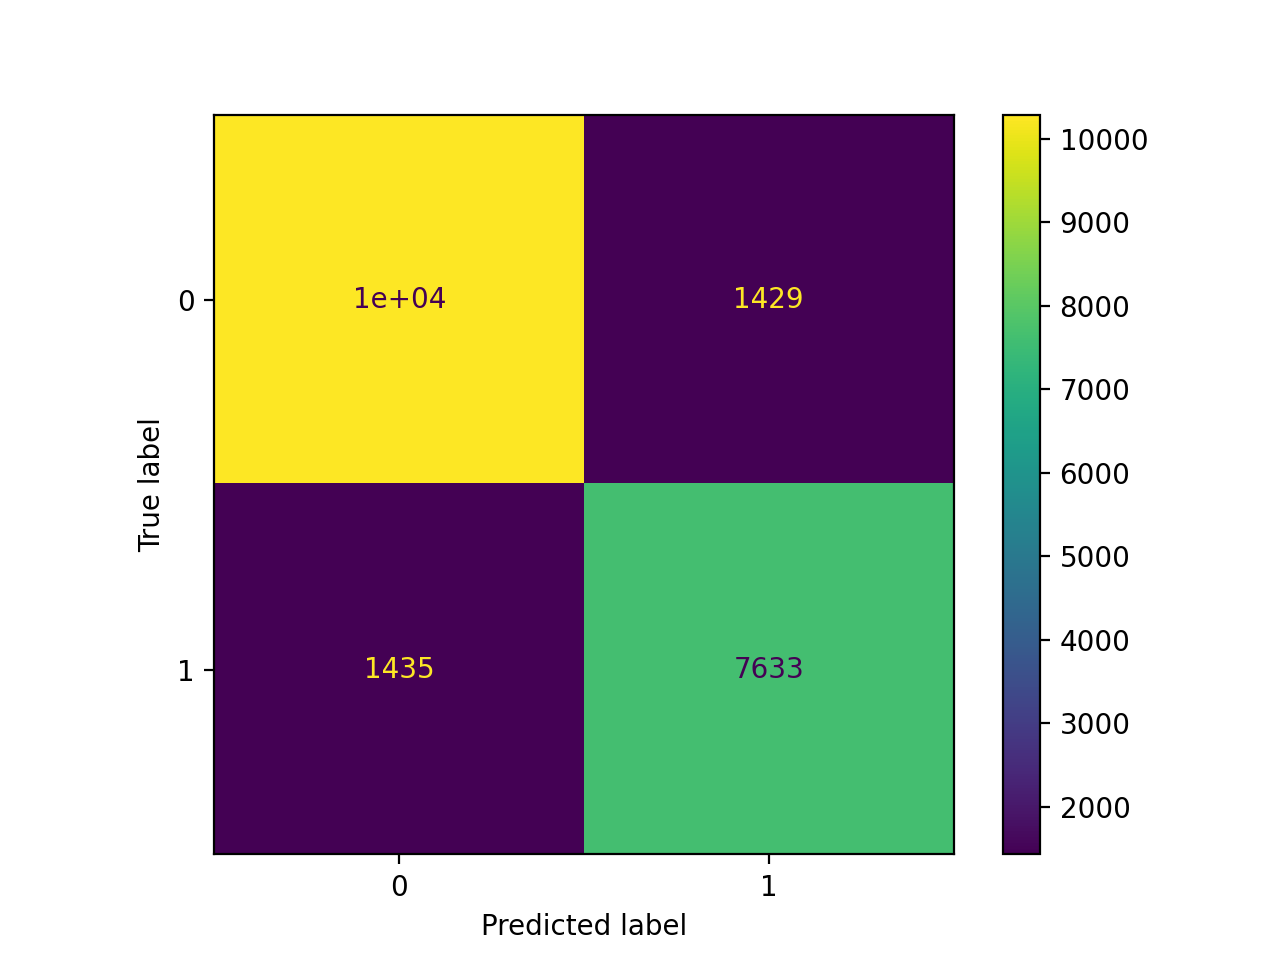

In [ ]:
# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(x_train, y_train)):
    # Ajustar GaussianNB a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    gnb.fit(x_train.iloc[train], y_train.iloc[train])
    probas_ = gnb.predict_proba(x_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = gnb.predict_proba(x_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = gnb
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(x_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

best_model = None
best_threshold = None
best_accuracy = 0

Fold 1 - Accuracy en validación: 0.9245759653554674, Accuracy en test: 0.925412636542996
Fold 2 - Accuracy en validación: 0.9245759653554674, Accuracy en test: 0.924209614551754
Fold 3 - Accuracy en validación: 0.923493323709852, Accuracy en test: 0.9247870651075502
Fold 4 - Accuracy en validación: 0.9209576515880654, Accuracy en test: 0.9236321639959578
Fold 5 - Accuracy en validación: 0.9186717998075072, Accuracy en test: 0.9247389442279005
Fold 6 - Accuracy en validación: 0.9239653512993262, Accuracy en test: 0.9248351859871998
Fold 7 - Accuracy en validación: 0.9227622714148219, Accuracy en test: 0.9247389442279005
Fold 8 - Accuracy en validación: 0.9233638113570741, Accuracy en test: 0.9238727683942063
Fold 9 - Accuracy en validación: 0.9225216554379211, Accuracy en test: 0.9241614936721043
Fold 10 - Accuracy en validación: 0.9273339749759384, Accuracy en test: 0.9248833068668495
Mejor modelo - Accuracy en test: 0.925412636542996, Umbral: 0.6


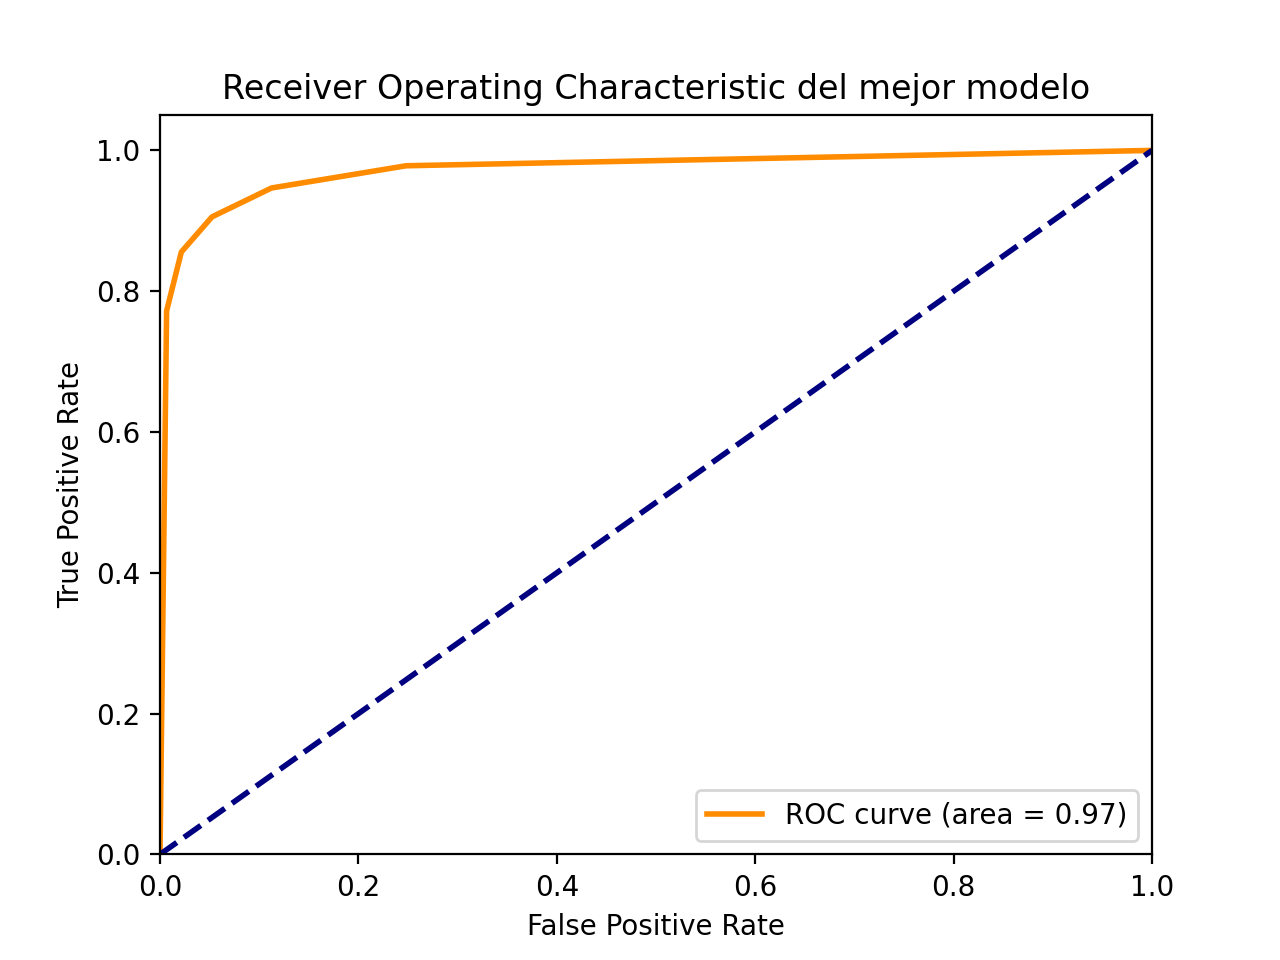

Mejor umbral: 0.6

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[11461   252]
 [ 1309  7759]]


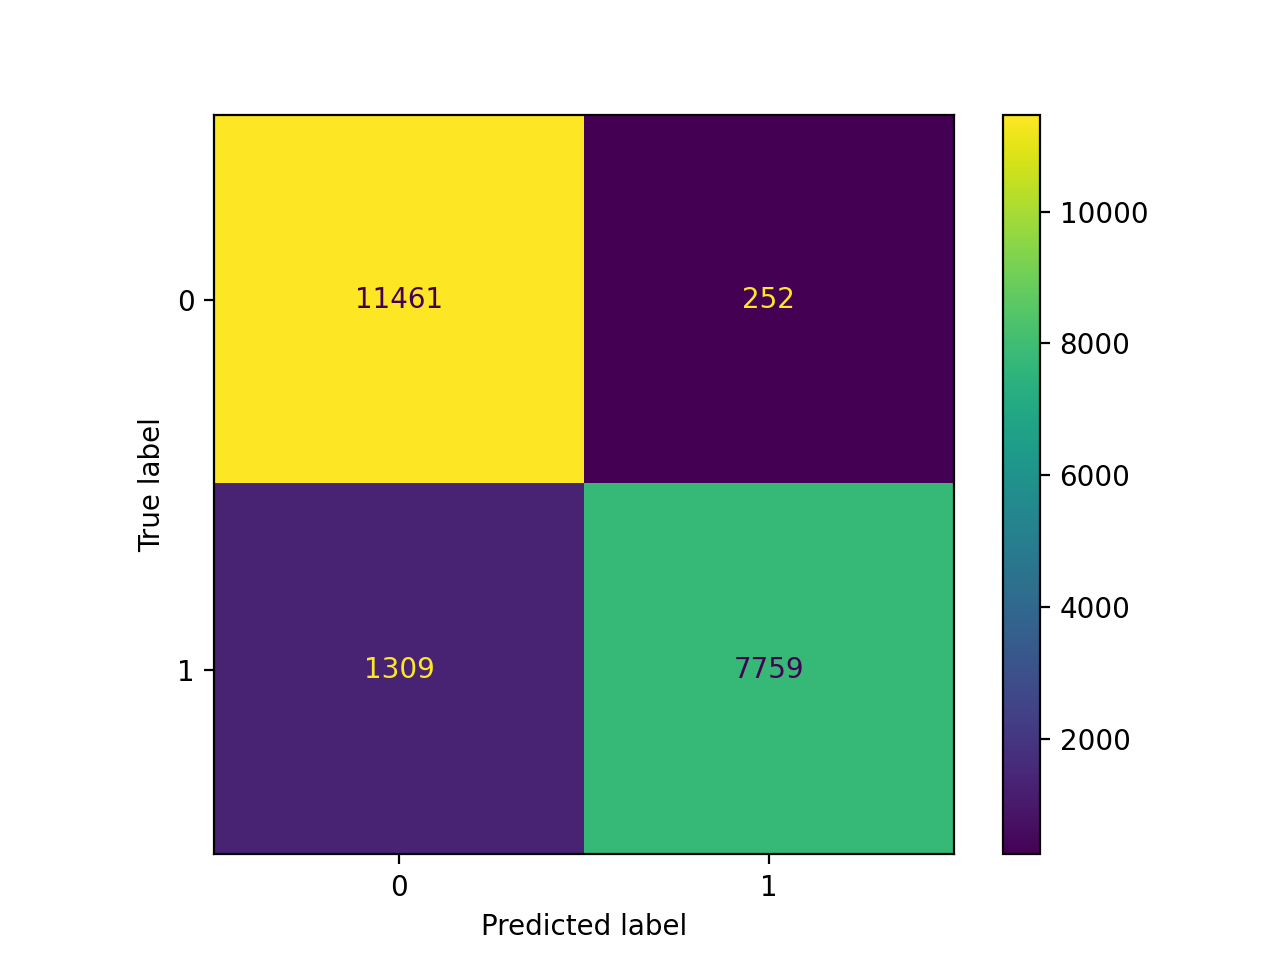

In [ ]:
# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(x_train, y_train)):
    # Ajustar GaussianNB a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    knn.fit(x_train.iloc[train], y_train.iloc[train])
    probas_ = knn.predict_proba(x_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = knn.predict_proba(x_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = knn
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(x_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()

# Logistico

$$\hat{p}(X_i) = \operatorname{expit}(X_i w + w_0) = \frac{1}{1 + \exp(-X_i w - w_0)}.$$

$$\min_{w} C \sum_{i=1}^n \left(-y_i \log(\hat{p}(X_i)) - (1 - y_i) \log(1 - \hat{p}(X_i))\right) + r(w).$$

In [ ]:
log=LogisticRegression(max_iter=500)
best_model = None
best_threshold = None
best_accuracy = 0

Fold 1 - Accuracy en validación: 0.9302297606159028, Accuracy en test: 0.9336413069630913
Fold 2 - Accuracy en validación: 0.9339588596174666, Accuracy en test: 0.9332082190462442
Fold 3 - Accuracy en validación: 0.9326356309394923, Accuracy en test: 0.9333525816851932
Fold 4 - Accuracy en validación: 0.9285370548604427, Accuracy en test: 0.9343631201578365
Fold 5 - Accuracy en validación: 0.9337102983638114, Accuracy en test: 0.933978153120639
Fold 6 - Accuracy en validación: 0.9311838306063522, Accuracy en test: 0.9335931860834416
Fold 7 - Accuracy en validación: 0.9329884504331087, Accuracy en test: 0.9344112410374862
Fold 8 - Accuracy en validación: 0.9327478344562079, Accuracy en test: 0.93383379048169
Fold 9 - Accuracy en validación: 0.9362367661212705, Accuracy en test: 0.9325345267311487
Fold 10 - Accuracy en validación: 0.9327478344562079, Accuracy en test: 0.9336413069630913
Mejor modelo - Accuracy en test: 0.9344112410374862, Umbral: 0.4429787958639048


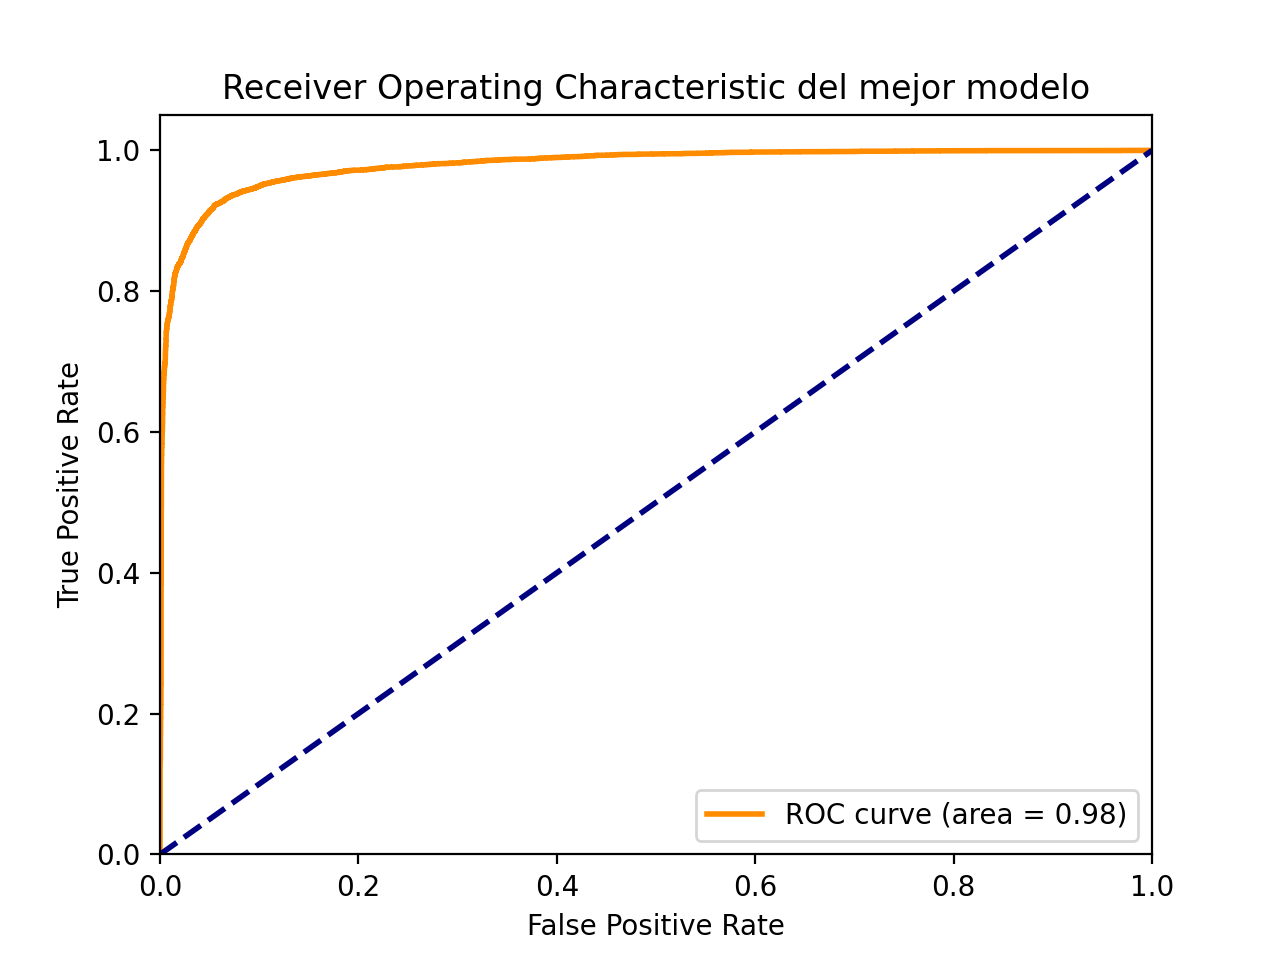

Mejor umbral: 0.4429787958639048

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[11039   674]
 [  691  8377]]


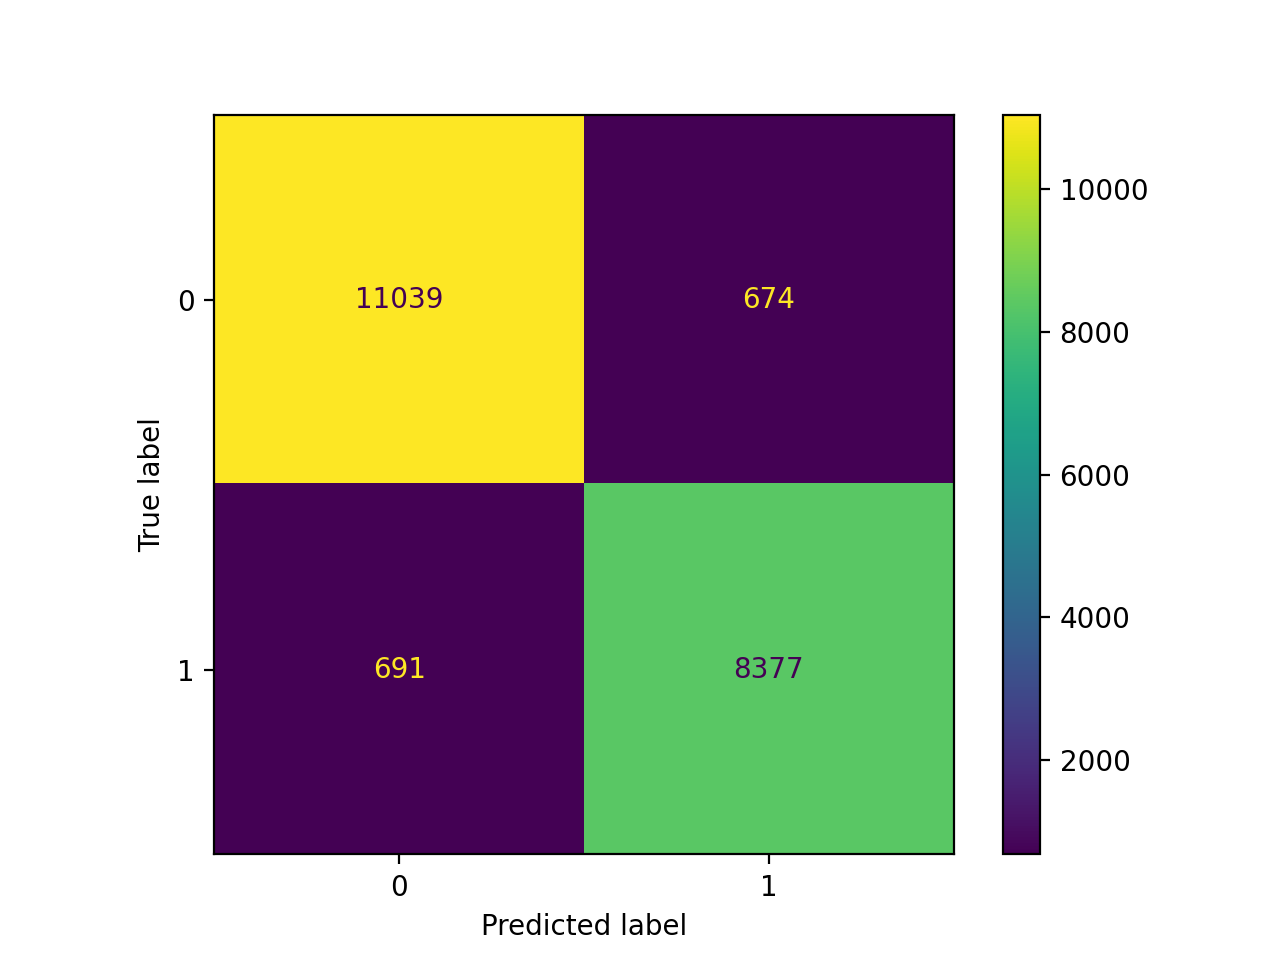

In [ ]:
# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(x_train, y_train)):
    # Ajustar GaussianNB a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    log.fit(x_train.iloc[train], y_train.iloc[train])
    probas_ = log.predict_proba(x_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = log.predict_proba(x_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = log
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(x_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()

# MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPC=MLPClassifier(solver='adam', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=40,
                   max_iter=500)
best_model = None
best_threshold = None
best_accuracy = 0

Fold 1 - Accuracy en validación: 0.9558522795621316, Accuracy en test: 0.955343823685097
Fold 2 - Accuracy en validación: 0.9553711054974137, Accuracy en test: 0.9553919445647466
Fold 3 - Accuracy en validación: 0.9557319860459521, Accuracy en test: 0.9546701313700015
Fold 4 - Accuracy en validación: 0.9538017324350336, Accuracy en test: 0.955199461046148
Fold 5 - Accuracy en validación: 0.9523580365736285, Accuracy en test: 0.9540445599345556
Fold 6 - Accuracy en validación: 0.9553657362848893, Accuracy en test: 0.958038592945479
Fold 7 - Accuracy en validación: 0.9546438883541867, Accuracy en test: 0.9535152302584091
Fold 8 - Accuracy en validación: 0.9547641963426372, Accuracy en test: 0.9558731533612435
Fold 9 - Accuracy en validación: 0.9554860442733397, Accuracy en test: 0.9531302632212116
Fold 10 - Accuracy en validación: 0.9588546679499519, Accuracy en test: 0.9570761753524855
Mejor modelo - Accuracy en test: 0.958038592945479, Umbral: 0.4185076248817332


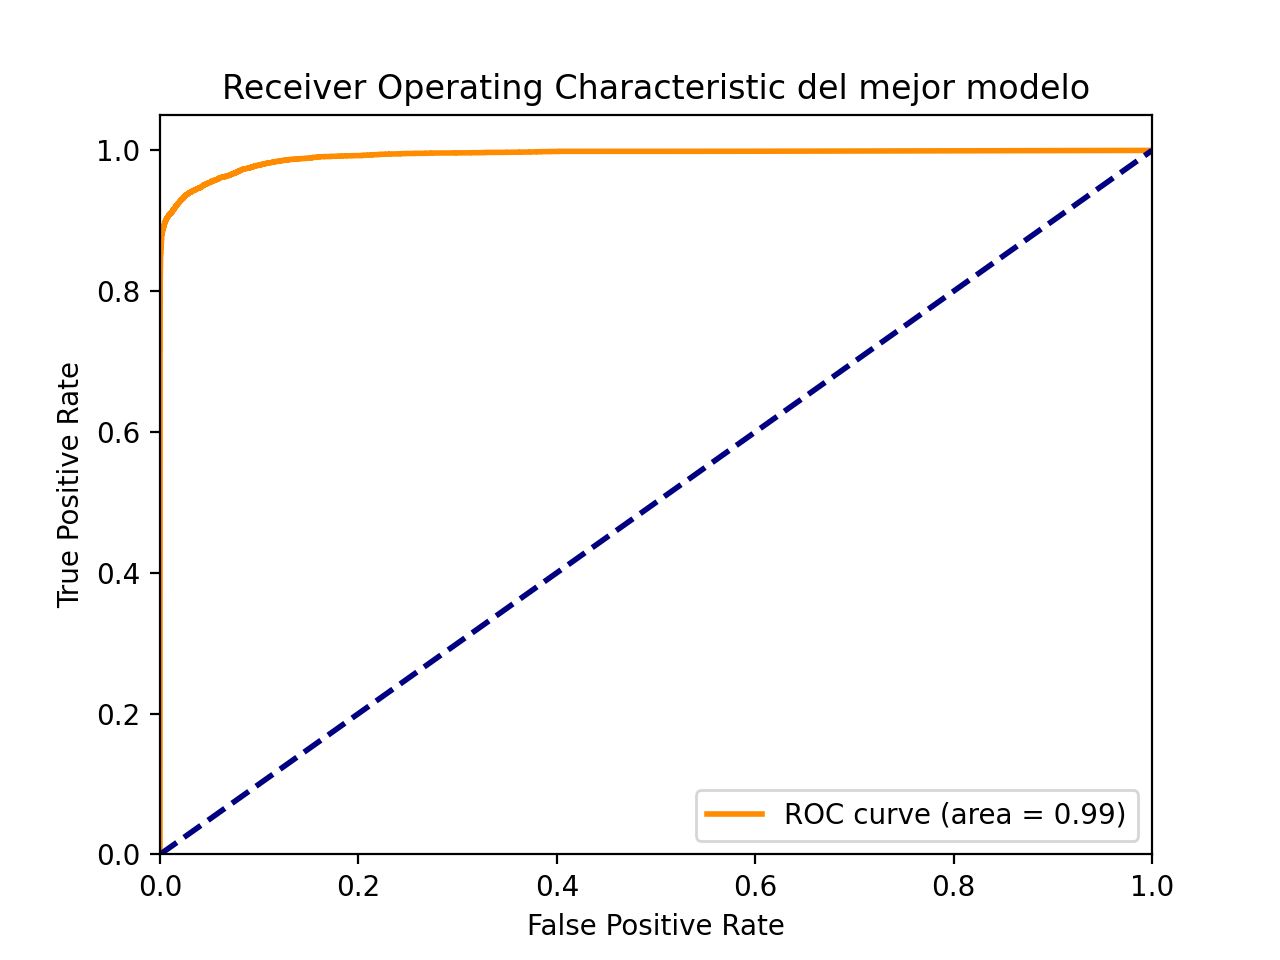

Mejor umbral: 0.4185076248817332

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[11383   330]
 [  560  8508]]


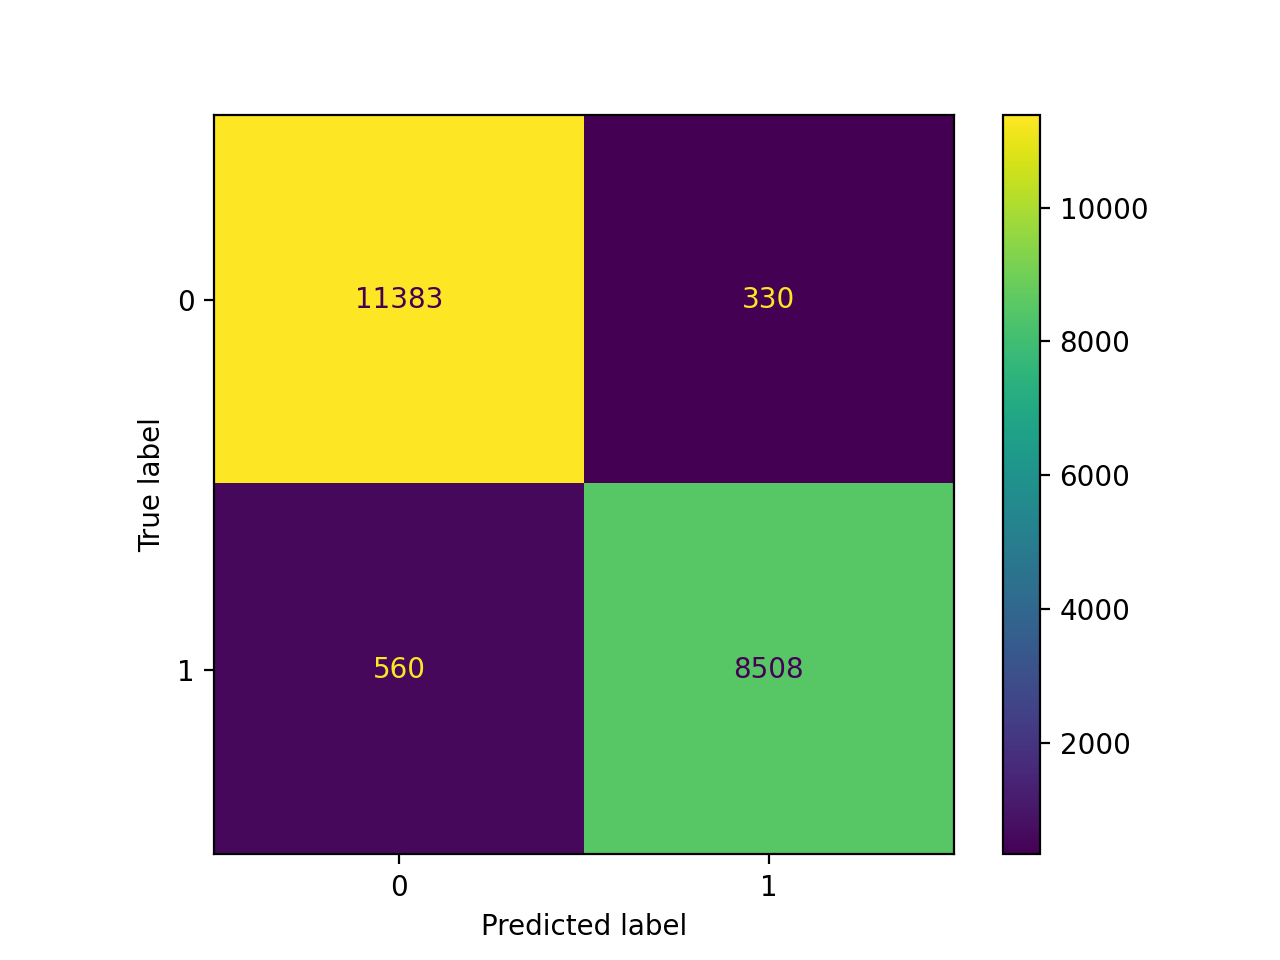

In [ ]:
# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(x_train, y_train)):
    # Ajustar GaussianNB a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    MLPC.fit(x_train.iloc[train], y_train.iloc[train])
    probas_ = MLPC.predict_proba(x_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = MLPC.predict_proba(x_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = MLPC
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(x_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
best_model = None
best_threshold = None
best_accuracy = 0


Fold 1 - Accuracy en validación: 0.9475520269457476, Accuracy en test: 0.9498580434050334
Fold 2 - Accuracy en validación: 0.9494767232046193, Accuracy en test: 0.9475482411818488
Fold 3 - Accuracy en validación: 0.943101166847107, Accuracy en test: 0.9480294499783456
Fold 4 - Accuracy en validación: 0.9471847930702598, Accuracy en test: 0.9497618016457341
Fold 5 - Accuracy en validación: 0.9459817131857555, Accuracy en test: 0.9484625378951927
Fold 6 - Accuracy en validación: 0.9511549566891242, Accuracy en test: 0.9499061642846831
Fold 7 - Accuracy en validación: 0.9489894128970163, Accuracy en test: 0.9463452191906068
Fold 8 - Accuracy en validación: 0.9475457170356112, Accuracy en test: 0.9502430104422309
Fold 9 - Accuracy en validación: 0.9470644850818094, Accuracy en test: 0.9486550214137914
Fold 10 - Accuracy en validación: 0.9481472569778633, Accuracy en test: 0.9476926038207979
Mejor modelo - Accuracy en test: 0.9502430104422309, Umbral: 0.5


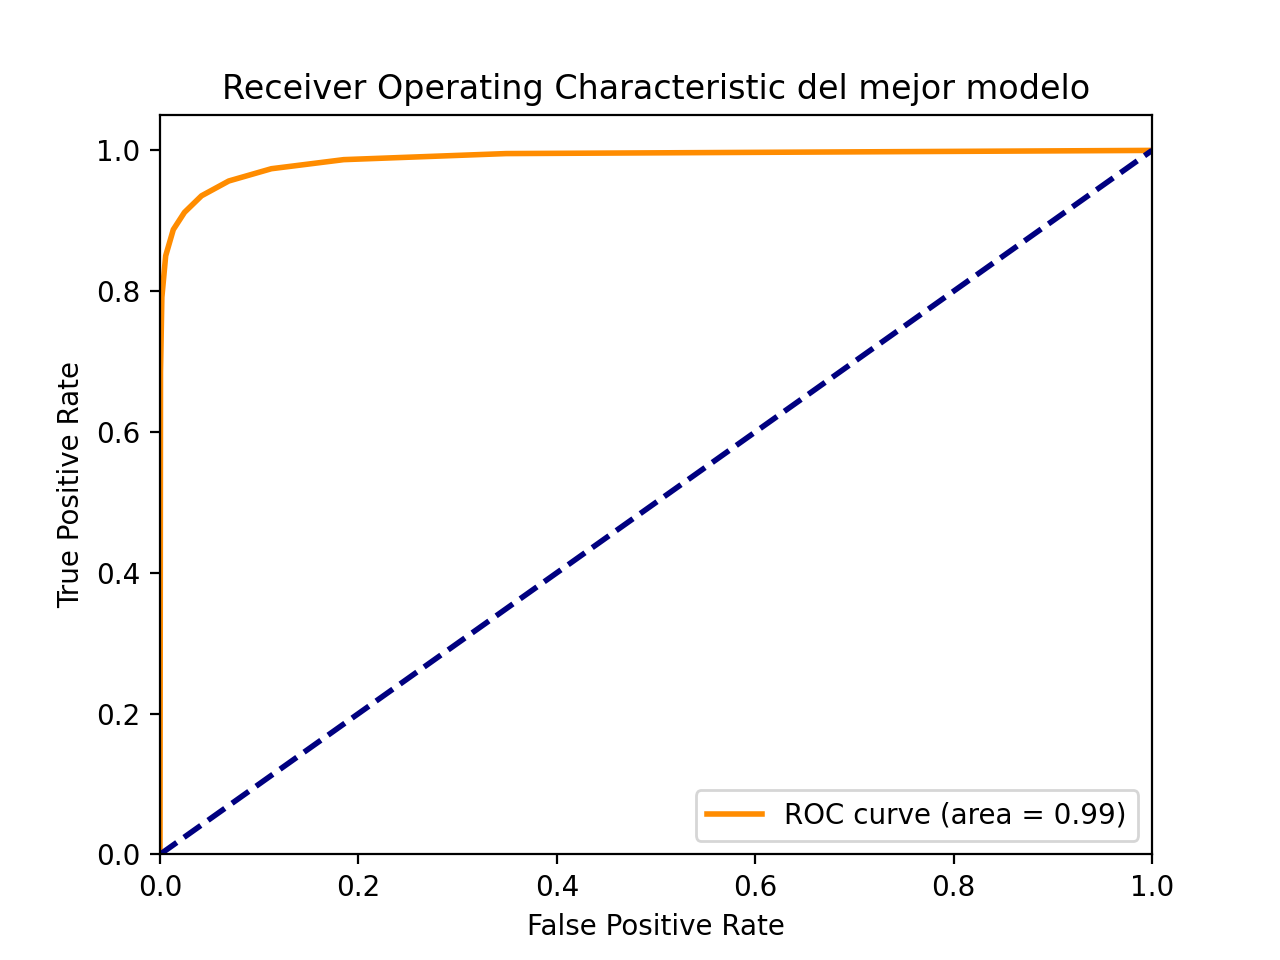

Mejor umbral: 0.5

----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Matriz de confusión del mejor modelo:
[[11424   289]
 [  798  8270]]


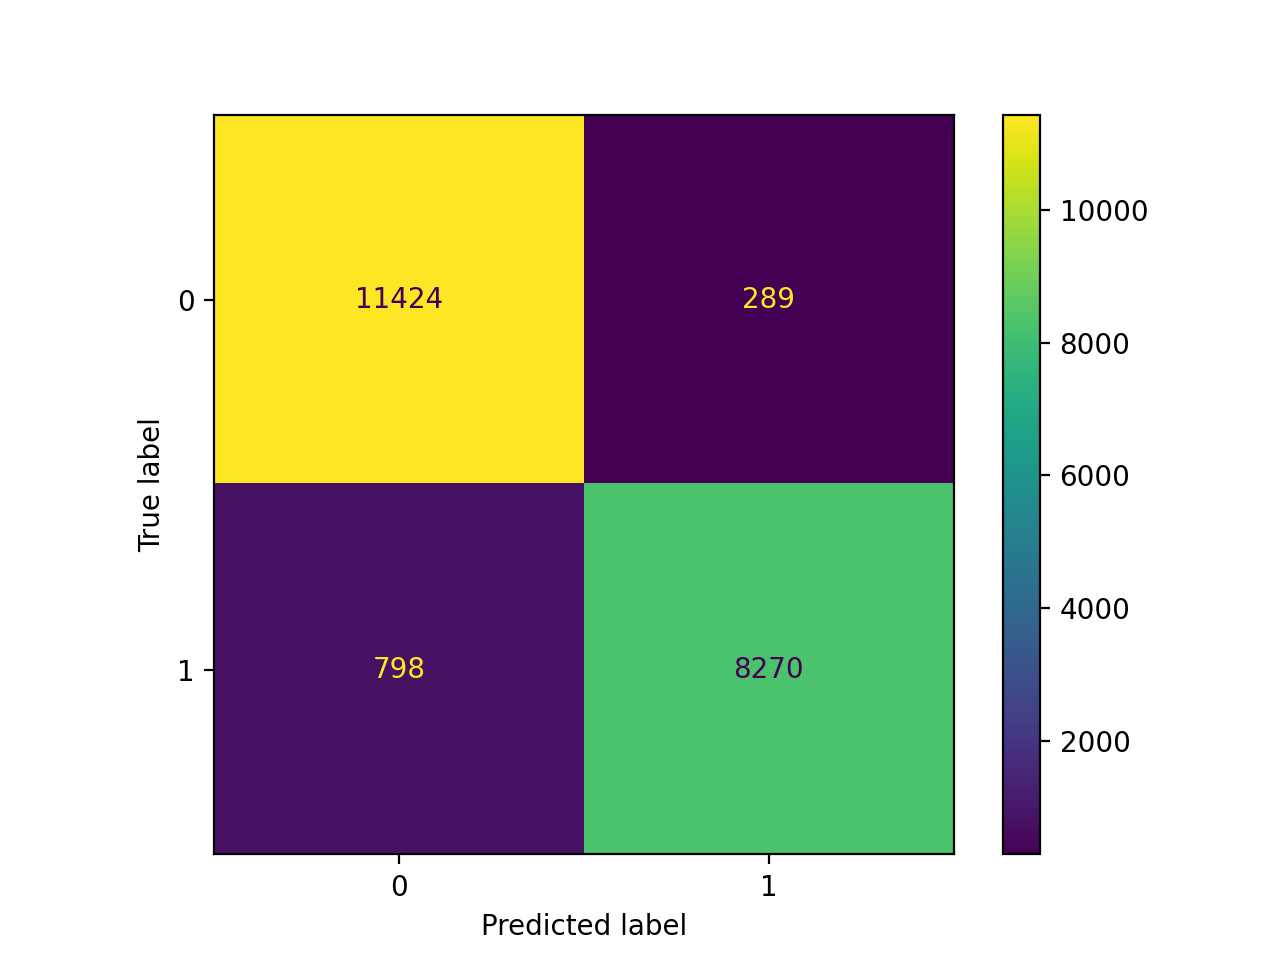

In [ ]:
# Para cada división de entrenamiento y validación en la validación cruzada
for i, (train, val) in enumerate(cv.split(x_train, y_train)):
    # Ajustar GaussianNB a los datos de entrenamiento y predecir las probabilidades para los datos de validación
    rf.fit(x_train.iloc[train], y_train.iloc[train])
    probas_ = rf.predict_proba(x_train.iloc[val])

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

    # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
    distances = ((1 - tpr)**2 + fpr**2)**0.5
    threshold = thresholds[np.argmin(distances)]

    # Generar las predicciones de clase usando el mejor umbral
    y_pred = (probas_[:, 1] > threshold).astype(int)

    # Calcular la precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_train.iloc[val], y_pred)

    # Calcular la precisión en el conjunto de prueba
    probas_test = rf.predict_proba(x_test)
    y_pred_test = (probas_test[:, 1] > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f'Fold {i+1} - Accuracy en validación: {accuracy_val}, Accuracy en test: {accuracy_test}')

    # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = rf
        best_threshold = threshold

print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

# Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
probas_ = best_model.predict_proba(x_test)
y_pred = (probas_[:, 1] > best_threshold).astype(int)

# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC del mejor modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic del mejor modelo')
plt.legend(loc="lower right")
plt.show()

print(f"Mejor umbral: {best_threshold}")
print("")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print("")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print("Matriz de confusión del mejor modelo:")
print(cm)

# Generar el plot
disp.plot()
plt.show()

# all


KNN
Fold 1 - Error en validación: 0.07542403464453262, Error en test: 0.07458736345700401
Fold 2 - Error en validación: 0.07542403464453262, Error en test: 0.07579038544824601
Fold 3 - Error en validación: 0.07650667629014796, Error en test: 0.07521293489244985
Fold 4 - Error en validación: 0.07904234841193458, Error en test: 0.07636783600404218
Fold 5 - Error en validación: 0.08132820019249276, Error en test: 0.07526105577209952
Fold 6 - Error en validación: 0.07603464870067378, Error en test: 0.07516481401280017
Fold 7 - Error en validación: 0.07723772858517808, Error en test: 0.07526105577209952
Fold 8 - Error en validación: 0.07663618864292587, Error en test: 0.07612723160579371
Fold 9 - Error en validación: 0.07747834456207892, Error en test: 0.07583850632789568
Fold 10 - Error en validación: 0.07266602502406161, Error en test: 0.0751166931331505
Mejor modelo - Accuracy en test: 0.925412636542996, Umbral: 0.6


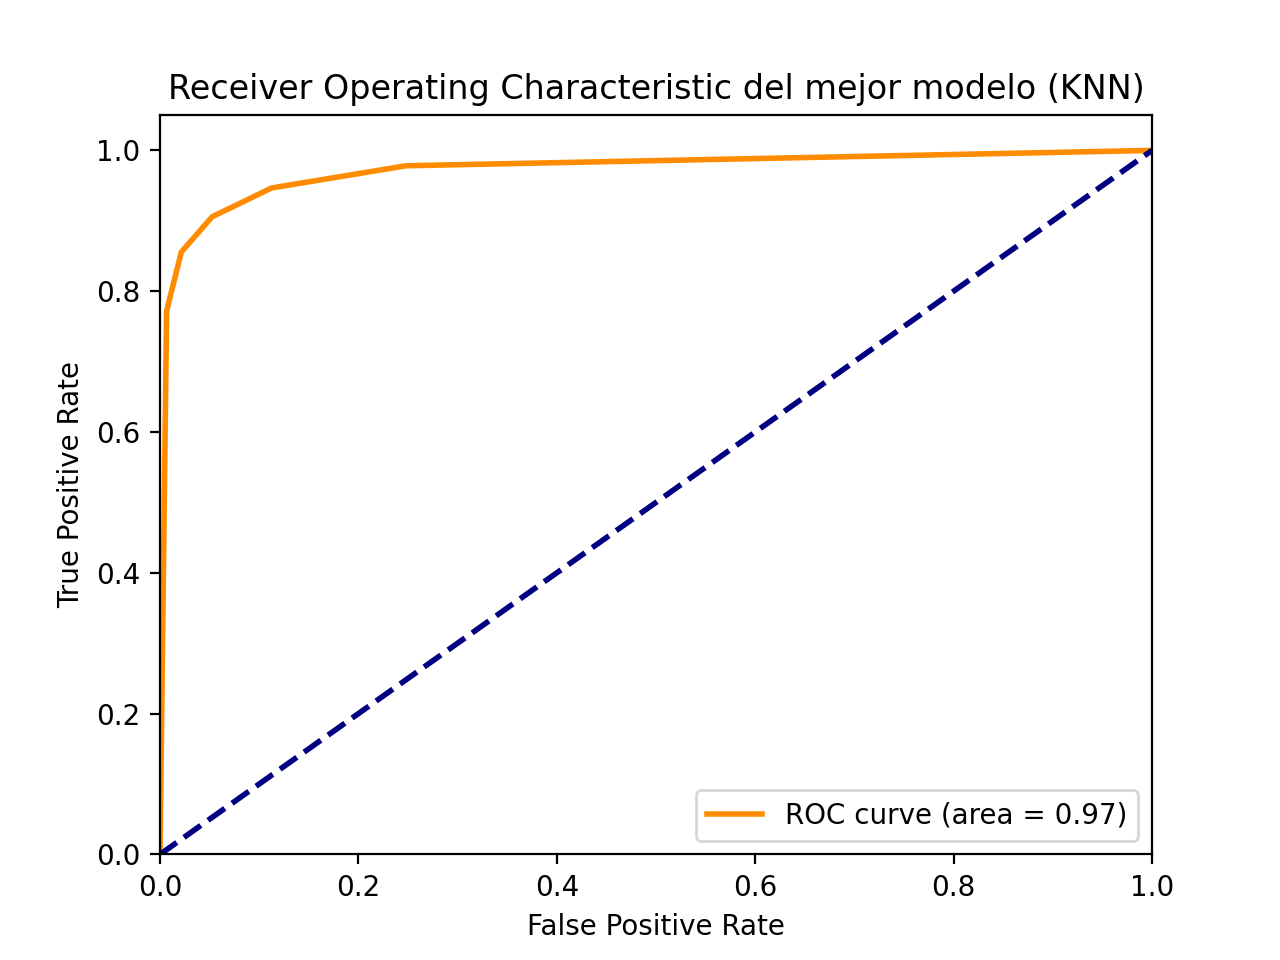

Mejor umbral: 0.6

Matriz de confusión del mejor modelo:
[[11461   252]
 [ 1309  7759]]


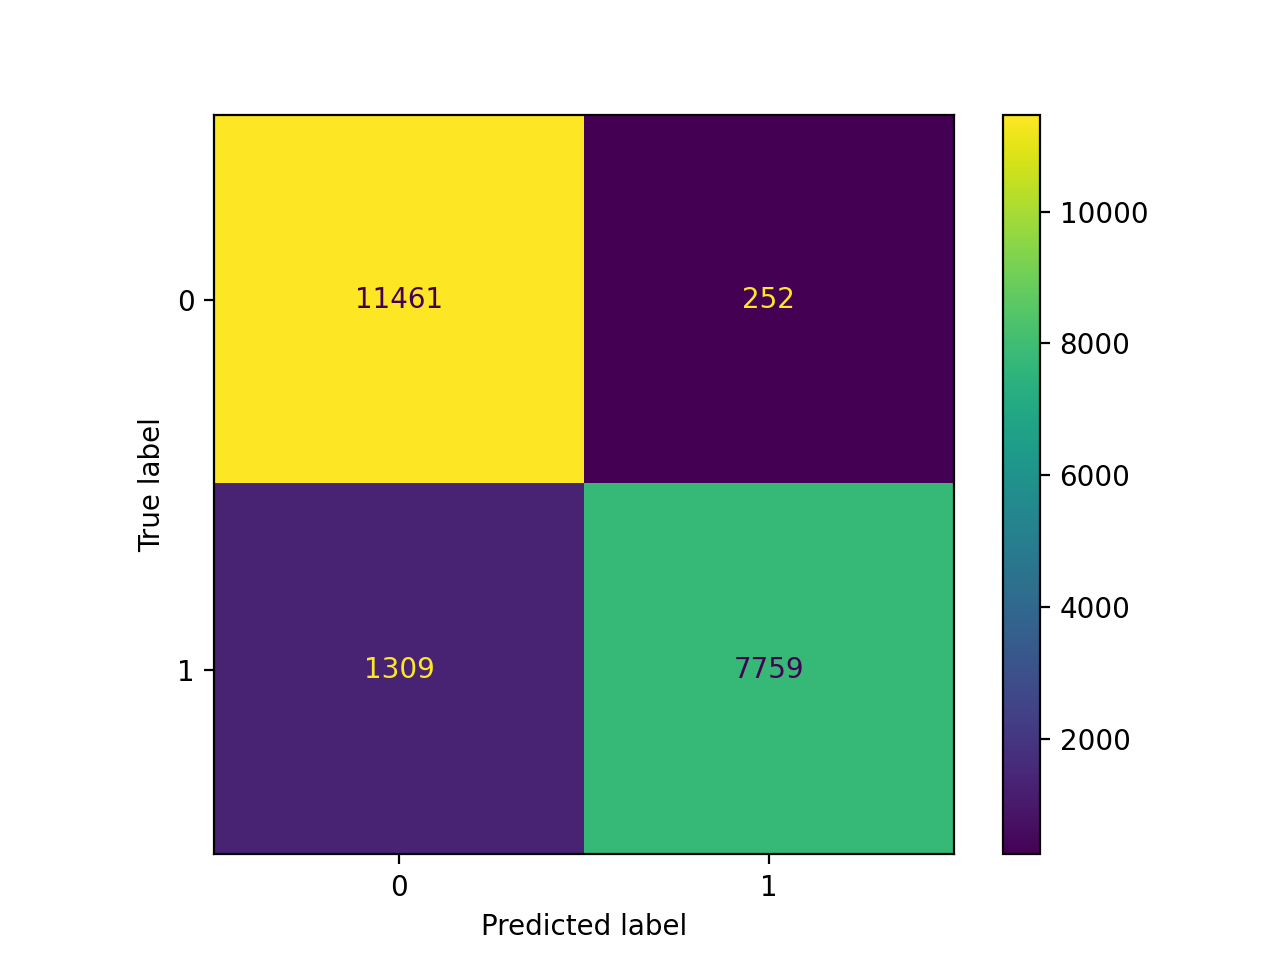


GNB
Fold 1 - Error en validación: 0.14002165283291235, Error en test: 0.1417641114479573
Fold 2 - Error en validación: 0.12979670395765663, Error en test: 0.13959867186372166
Fold 3 - Error en validación: 0.1352099121857332, Error en test: 0.13945430922477264
Fold 4 - Error en validación: 0.14376804619826755, Error en test: 0.1446994851065877
Fold 5 - Error en validación: 0.13654956689124154, Error en test: 0.13955055098407199
Fold 6 - Error en validación: 0.13606833493743986, Error en test: 0.13767383667773447
Fold 7 - Error en validación: 0.1339027911453321, Error en test: 0.13950243010442231
Fold 8 - Error en validación: 0.13474494706448503, Error en test: 0.14147538617005917
Fold 9 - Error en validación: 0.13763233878729553, Error en test: 0.14234156200375347
Fold 10 - Error en validación: 0.1410009624639076, Error en test: 0.1450363312641355
Mejor modelo - Accuracy en test: 0.8623261633222655, Umbral: 0.10965656787378412


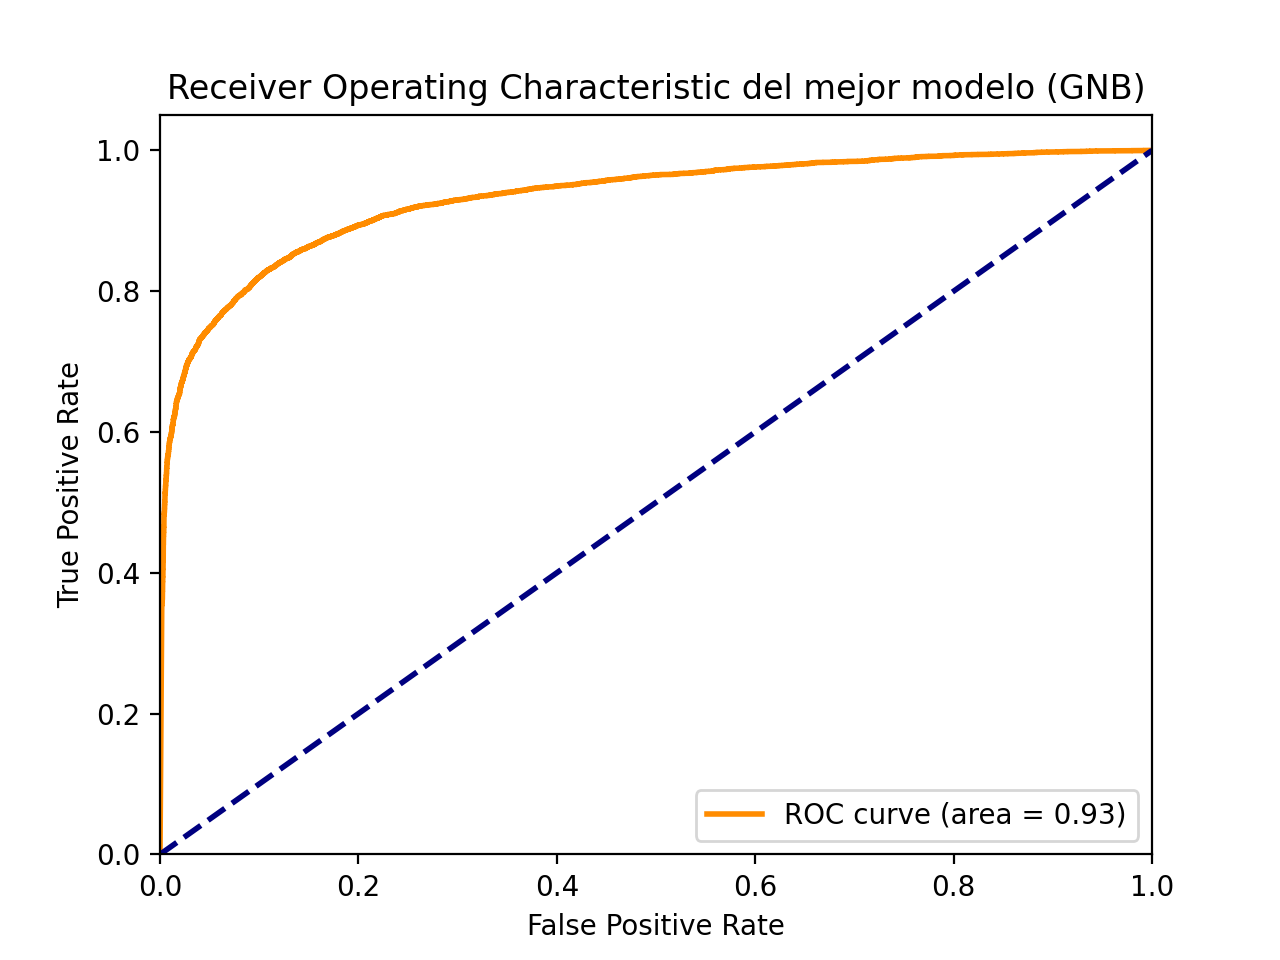

Mejor umbral: 0.10965656787378412

Matriz de confusión del mejor modelo:
[[10284  1429]
 [ 1435  7633]]


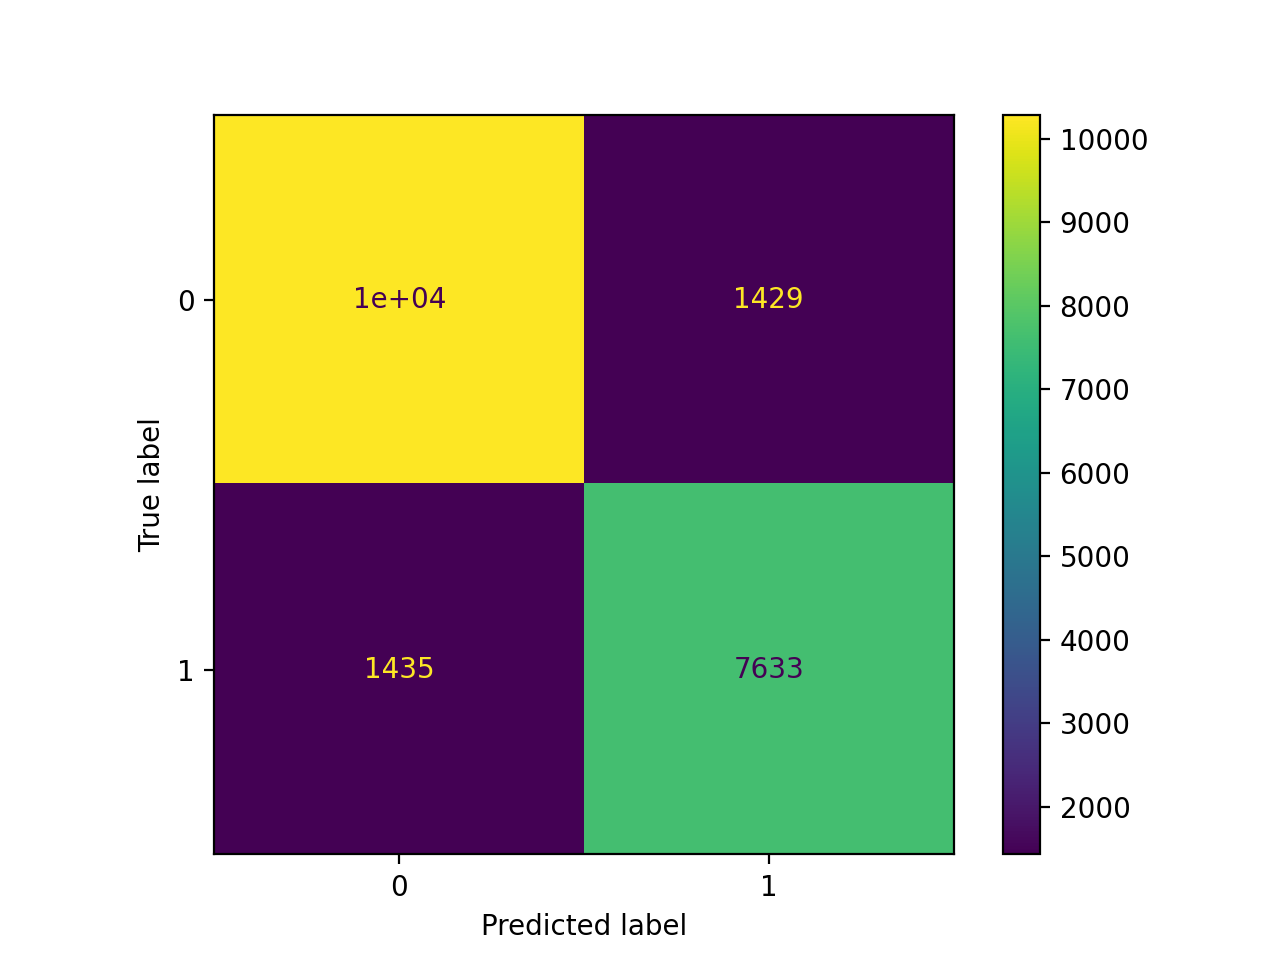


LOG
Fold 1 - Error en validación: 0.06977023938409721, Error en test: 0.06635869303690867
Fold 2 - Error en validación: 0.06604114038253339, Error en test: 0.06679178095375582
Fold 3 - Error en validación: 0.06736436906050769, Error en test: 0.0666474183148068
Fold 4 - Error en validación: 0.07146294513955731, Error en test: 0.06563687984216349
Fold 5 - Error en validación: 0.06628970163618864, Error en test: 0.06602184687936097
Fold 6 - Error en validación: 0.06881616939364776, Error en test: 0.06640681391655845
Fold 7 - Error en validación: 0.06701154956689126, Error en test: 0.06558875896251382
Fold 8 - Error en validación: 0.0672521655437921, Error en test: 0.06616620951830998
Fold 9 - Error en validación: 0.06376323387872951, Error en test: 0.06746547326885133
Fold 10 - Error en validación: 0.0672521655437921, Error en test: 0.06635869303690867
Mejor modelo - Accuracy en test: 0.9344112410374862, Umbral: 0.4429787958639048


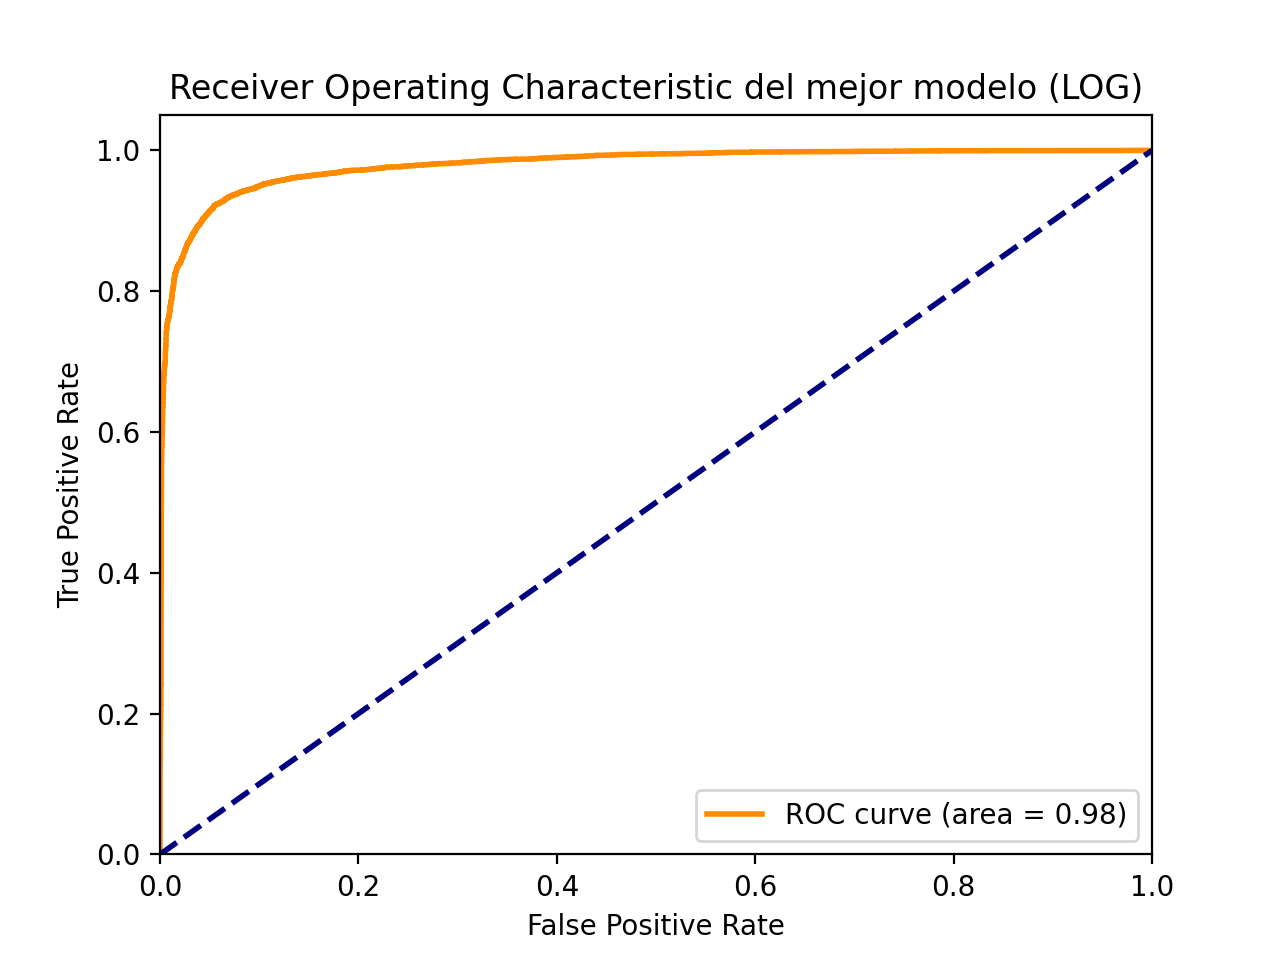

Mejor umbral: 0.4429787958639048

Matriz de confusión del mejor modelo:
[[11039   674]
 [  691  8377]]


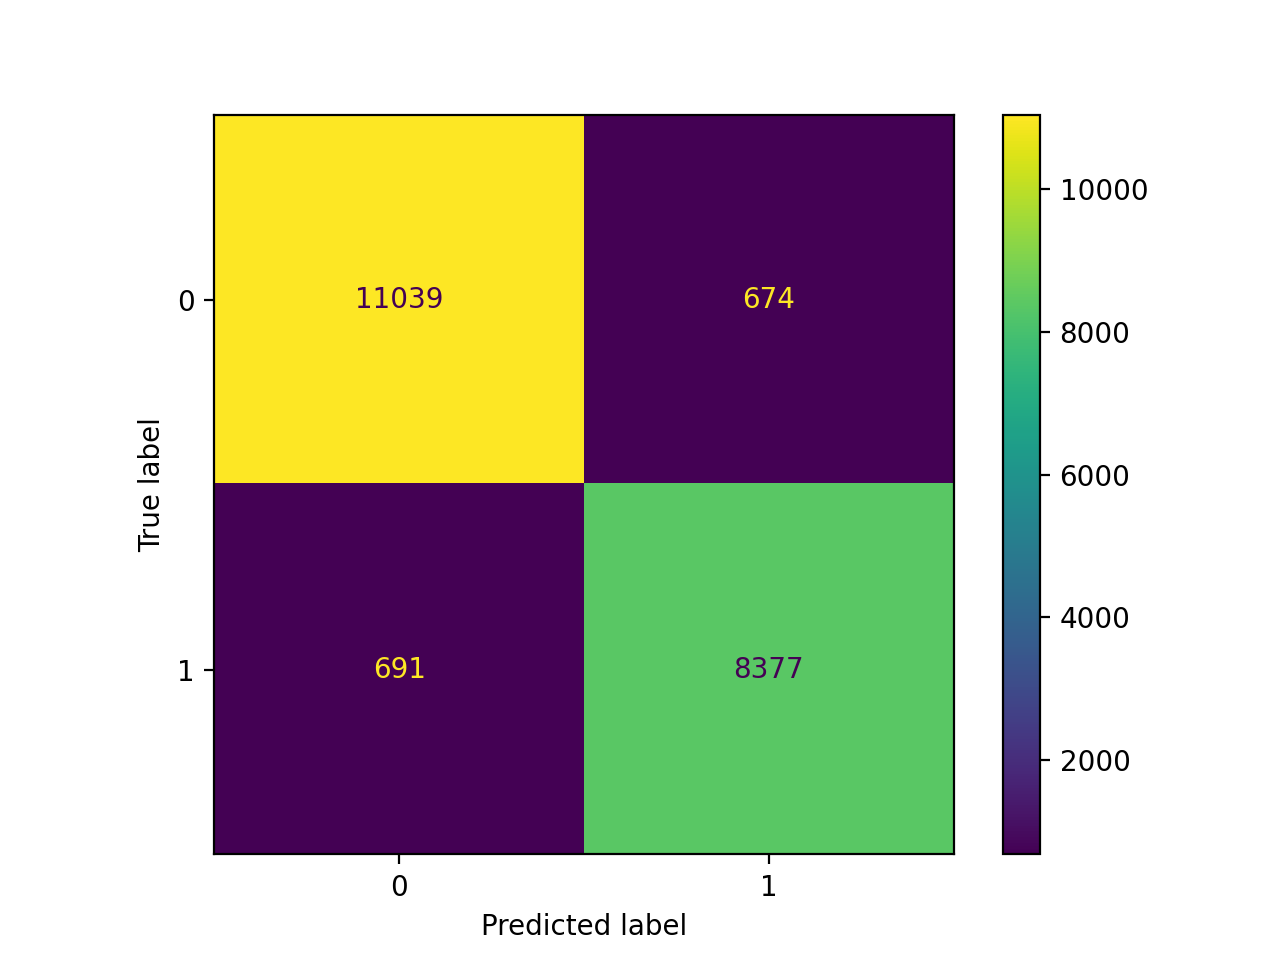


MLPC
Fold 1 - Error en validación: 0.04414772043786841, Error en test: 0.04465617631490304
Fold 2 - Error en validación: 0.044628894502586336, Error en test: 0.04460805543525337
Fold 3 - Error en validación: 0.04426801395404789, Error en test: 0.04532986862999855
Fold 4 - Error en validación: 0.04619826756496637, Error en test: 0.044800538953852054
Fold 5 - Error en validación: 0.0476419634263715, Error en test: 0.045955440065444386
Fold 6 - Error en validación: 0.0446342637151107, Error en test: 0.041961407054521005
Fold 7 - Error en validación: 0.045356111645813324, Error en test: 0.04648476974159088
Fold 8 - Error en validación: 0.045235803657362794, Error en test: 0.044126846638756545
Fold 9 - Error en validación: 0.04451395572666028, Error en test: 0.04686973677878836
Fold 10 - Error en validación: 0.04114533205004811, Error en test: 0.04292382464751454
Mejor modelo - Accuracy en test: 0.958038592945479, Umbral: 0.4185076248817332


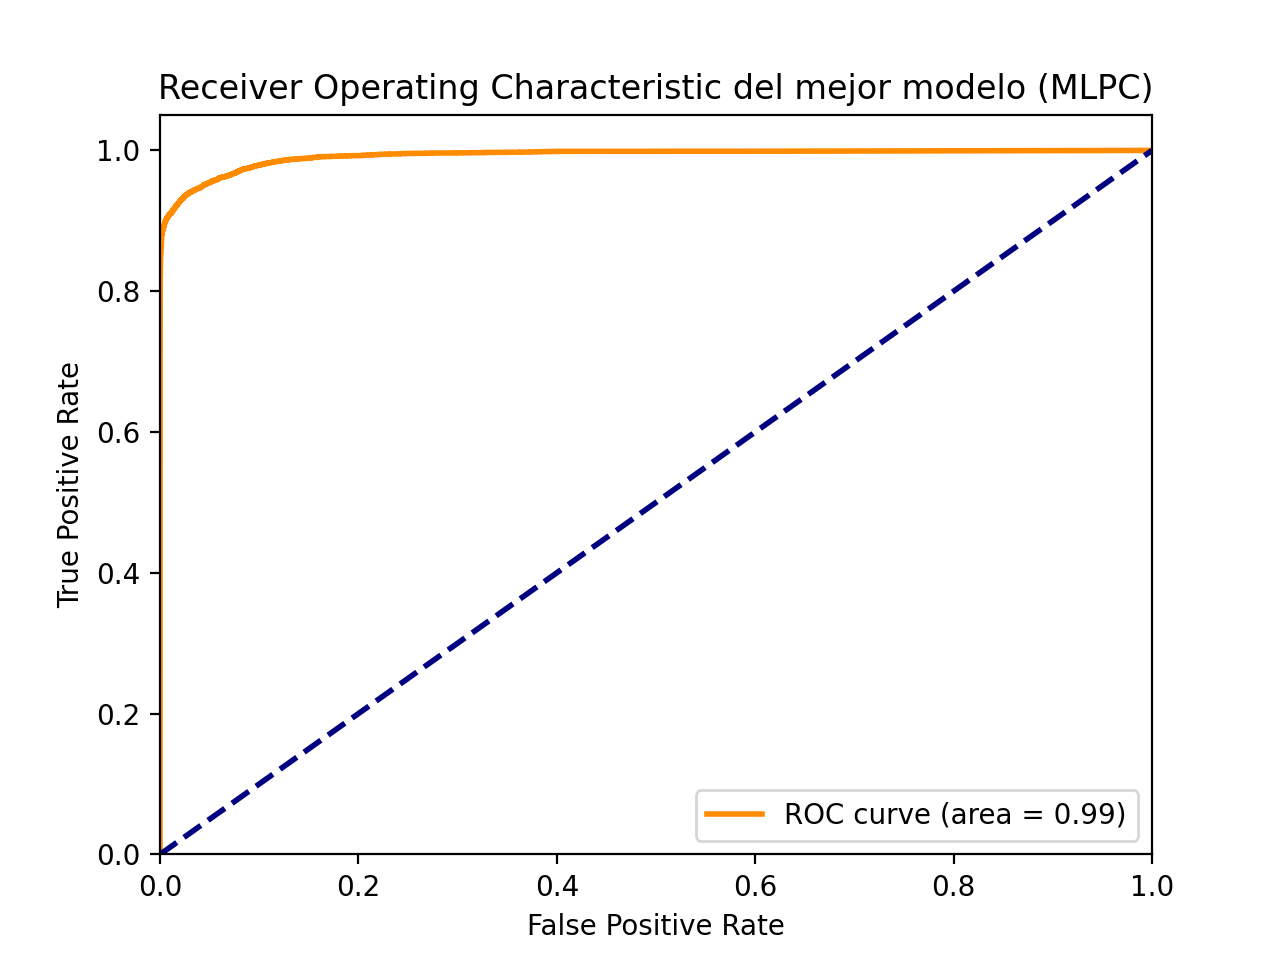

Mejor umbral: 0.4185076248817332

Matriz de confusión del mejor modelo:
[[11383   330]
 [  560  8508]]


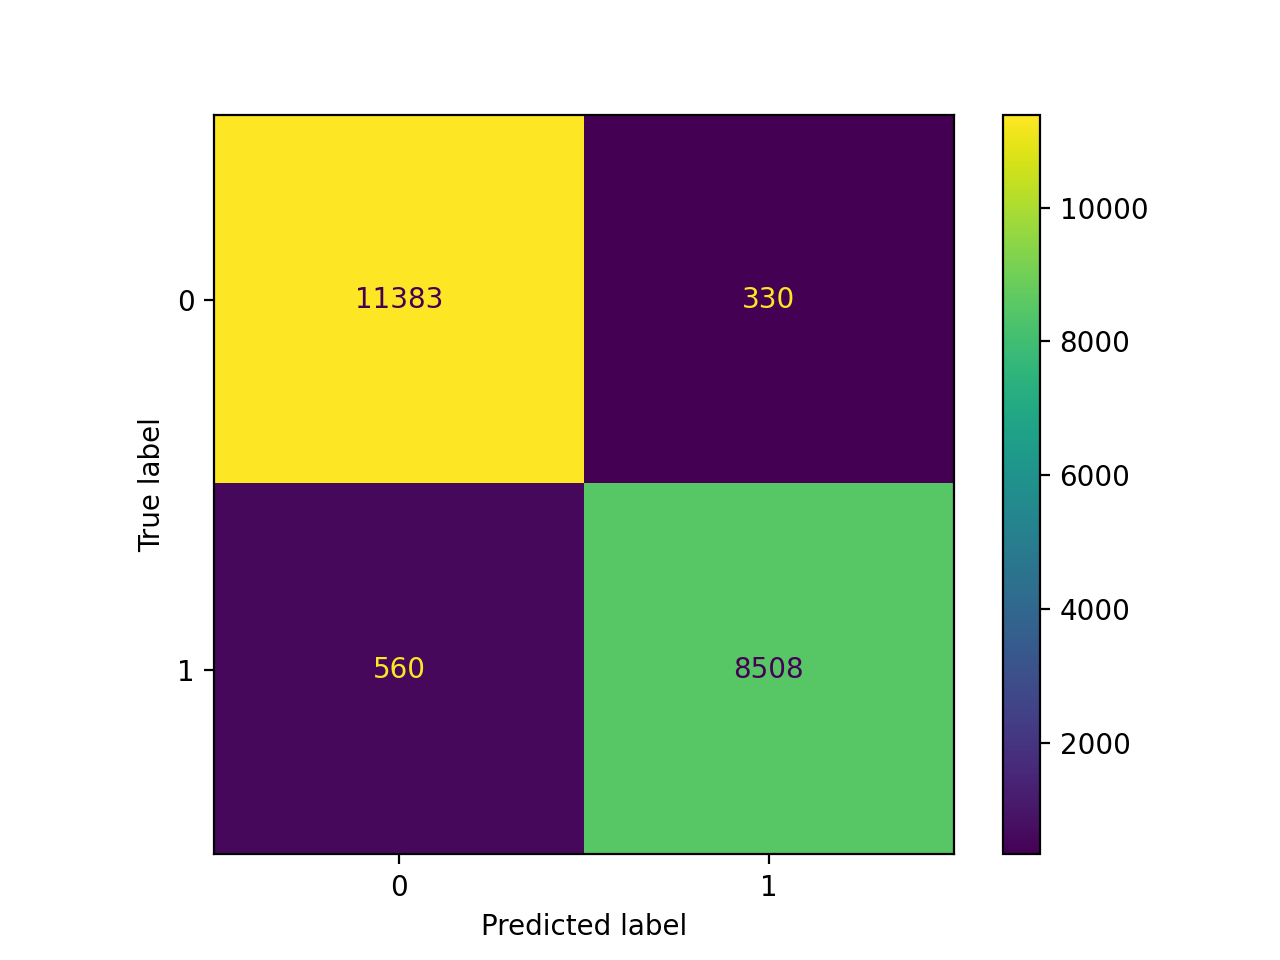


rf
Fold 1 - Error en validación: 0.04703476482617586, Error en test: 0.049516385159520726
Fold 2 - Error en validación: 0.05136533140863708, Error en test: 0.05047880275251426
Fold 3 - Error en validación: 0.05485384337784194, Error en test: 0.04884269284442522
Fold 4 - Error en validación: 0.052935514918190596, Error en test: 0.05120061594725955
Fold 5 - Error en validación: 0.051852743022136716, Error en test: 0.05004571483566722
Fold 6 - Error en validación: 0.04980750721847926, Error en test: 0.04898705548337423
Fold 7 - Error en validación: 0.050769971126082725, Error en test: 0.048361484047928394
Fold 8 - Error en validación: 0.05113089509143409, Error en test: 0.05004571483566722
Fold 9 - Error en validación: 0.05341674687199227, Error en test: 0.05115249506760988
Fold 10 - Error en validación: 0.05004812319538021, Error en test: 0.05153746210480725
Mejor modelo - Accuracy en test: 0.9516385159520716, Umbral: 0.5


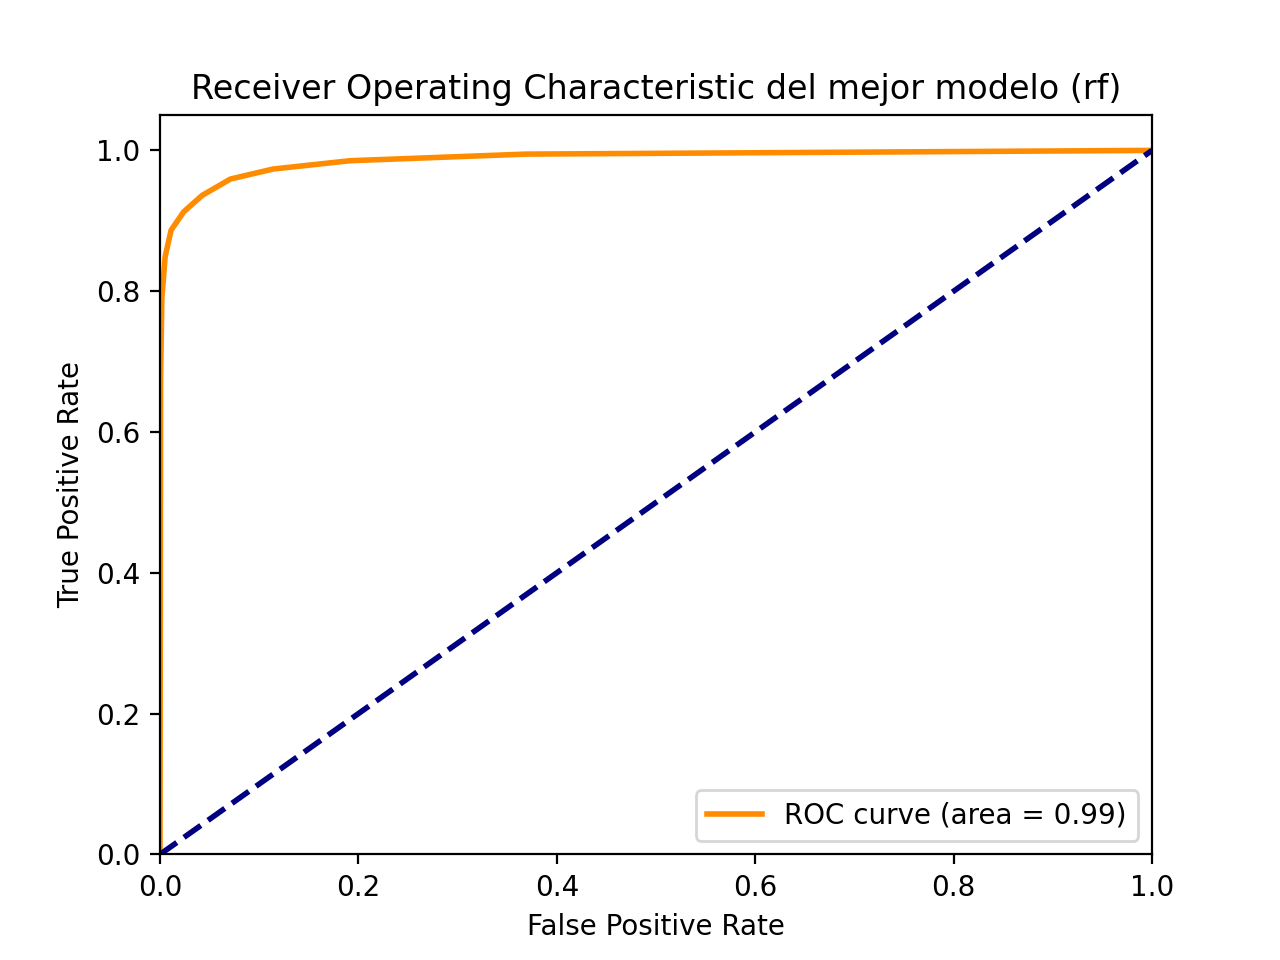

Mejor umbral: 0.5

Matriz de confusión del mejor modelo:
[[11435   278]
 [  793  8275]]


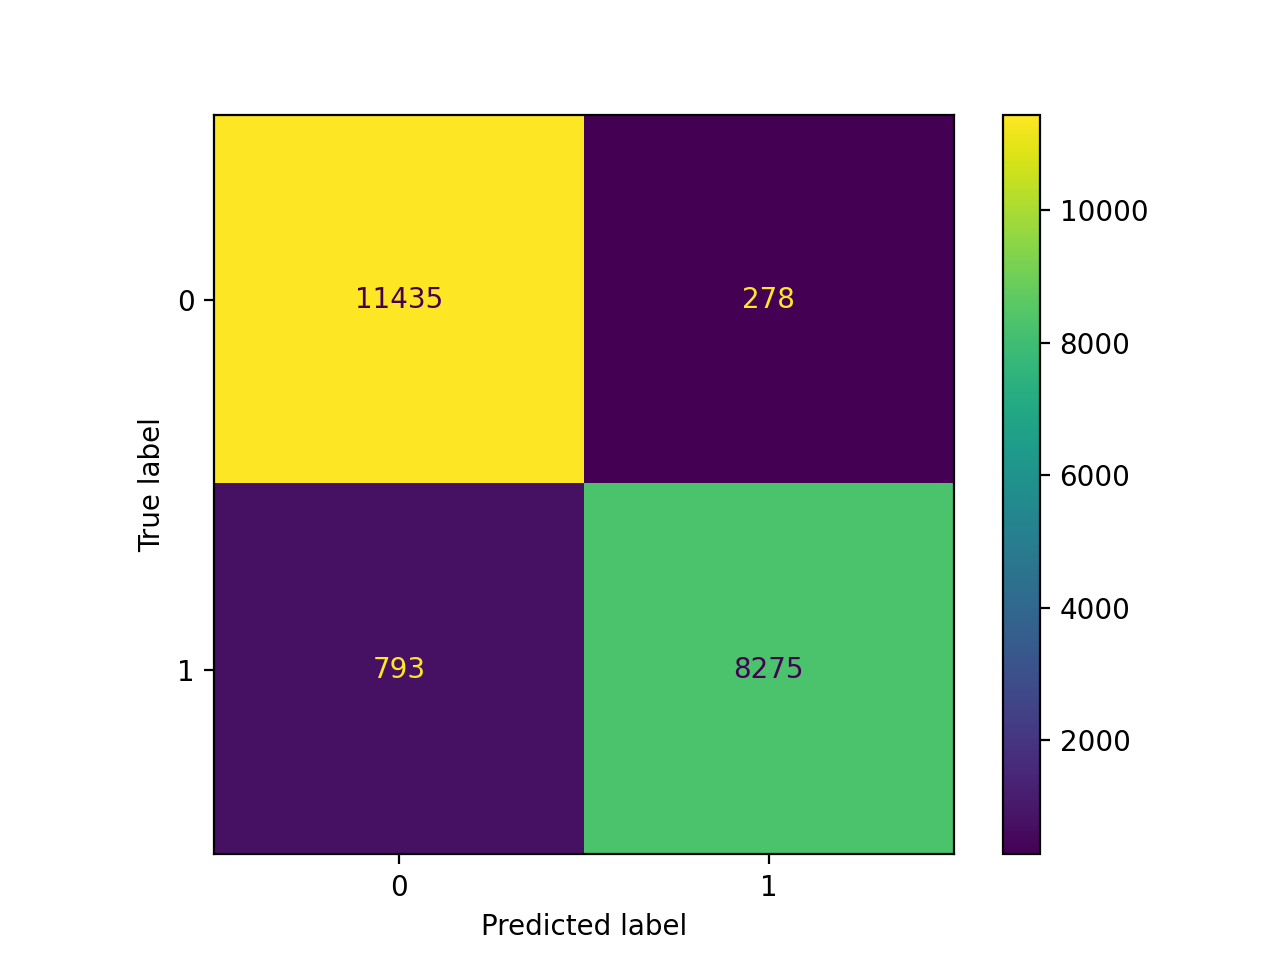

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Primero, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Configurar la validación cruzada estratificada con 5 divisiones
cv = StratifiedKFold(n_splits=10)

# Crear los objetos de los modelos
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
log = LogisticRegression(max_iter=500)
MLPC=MLPClassifier(solver='adam', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=40,
                   max_iter=500)
rf=RandomForestClassifier(n_estimators=10)

models = [knn, gnb, log,MLPC,rf]
model_names = ['KNN', 'GNB','LOG','MLPC','rf']

# Diccionario para almacenar la información de cada modelo
model_info = {}

for model, name in zip(models, model_names):
    print(f"\n{name}")

    best_model = None
    best_threshold = None
    best_accuracy = 0
    # Listas para almacenar los errores de validación y de prueba
    val_errors = []
    test_errors = []

    # Para cada división de entrenamiento y validación en la validación cruzada
    for i, (train, val) in enumerate(cv.split(x_train, y_train)):
        # Ajustar el modelo a los datos de entrenamiento y predecir las probabilidades para los datos de validación
        model.fit(x_train.iloc[train], y_train.iloc[train])
        probas_ = model.predict_proba(x_train.iloc[val])

        # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
        fpr, tpr, thresholds = roc_curve(y_train.iloc[val], probas_[:, 1])

        # Para encontrar el mejor umbral de clasificación, calculamos la distancia de cada punto en la curva ROC al punto ideal (FPR = 0, TPR = 1).
        distances = ((1 - tpr)**2 + fpr**2)**0.5
        threshold = thresholds[np.argmin(distances)]

        # Generar las predicciones de clase usando el mejor umbral
        y_pred = (probas_[:, 1] > threshold).astype(int)

        # Calcular el error en el conjunto de validación y almacenarlo en la lista
        val_errors.append(1 - accuracy_score(y_train.iloc[val], y_pred))

        # Calcular el error en el conjunto de prueba y almacenarlo en la lista
        probas_test = model.predict_proba(x_test)
        y_pred_test = (probas_test[:, 1] > threshold).astype(int)
        test_errors.append(1 - accuracy_score(y_test, y_pred_test))

        print(f'Fold {i+1} - Error en validación: {val_errors[-1]}, Error en test: {test_errors[-1]}')

        accuracy_test = accuracy_score(y_test, y_pred_test)

        # Si la precisión en el conjunto de prueba es la más alta hasta ahora, almacenar el modelo y el umbral
        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_model = model
            best_threshold = threshold

    print(f"Mejor modelo - Accuracy en test: {best_accuracy}, Umbral: {best_threshold}")

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(x_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic del mejor modelo ({name})')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Mejor umbral: {best_threshold}")
    print("")

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Crear el objeto ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    print("Matriz de confusión del mejor modelo:")
    print(cm)

    # Generar el plot
    disp.plot()
    plt.show()

    # Guardar la información de este modelo en el diccionario
    model_info[name] = {
        'val_errors': val_errors,
        'test_errors': test_errors,
        'best_model': best_model,
        'best_threshold': best_threshold
    }

# Normalidad de los errores

In [ ]:
from scipy.stats import shapiro

# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener los errores de prueba
    test_errors = model_data['test_errors']

    # Aplicar el test de Shapiro-Wilk
    stat, p = shapiro(test_errors)

    print(f"\n{model_name}")
    print(f'Statistics={stat:.3f}, p={p:.3f}')

    # Interpretar
    alpha = 0.05
    if p > alpha:
        print('no se rechaza H0')
    else:
        print('se rechaza H0')


KNN
Statistics=0.937, p=0.525
no se rechaza H0

GNB
Statistics=0.913, p=0.302
no se rechaza H0

LOG
Statistics=0.951, p=0.681
no se rechaza H0

MLPC
Statistics=0.961, p=0.802
no se rechaza H0

rf
Statistics=0.950, p=0.666
no se rechaza H0


# se grafican las curvas ROC

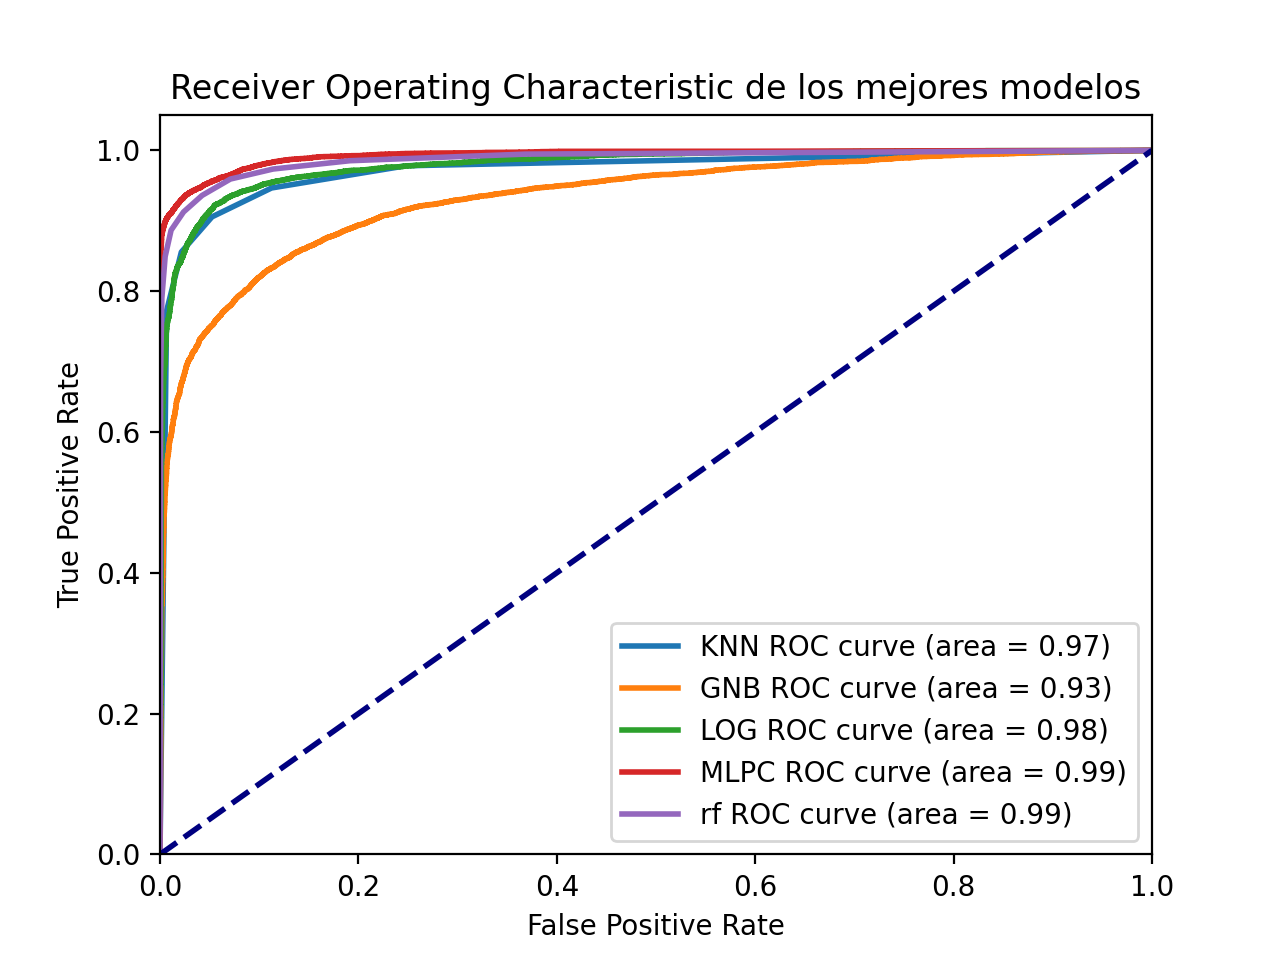

In [ ]:
plt.figure()

# Recorrer cada modelo en el diccionario
for model_name, model_data in model_info.items():
    # Obtener el mejor modelo y el mejor umbral
    best_model = model_data['best_model']
    best_threshold = model_data['best_threshold']

    # Usar el mejor modelo para generar las predicciones de clase en el conjunto de prueba
    probas_ = best_model.predict_proba(x_test)
    y_pred = (probas_[:, 1] > best_threshold).astype(int)

    # Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
    fpr, tpr, _ = roc_curve(y_test, probas_[:, 1])

    # Calcular el área bajo la curva ROC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC del mejor modelo
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Añadir la línea de azar
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Ajustar los límites y etiquetas de los ejes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Añadir título y leyenda
plt.title('Receiver Operating Characteristic de los mejores modelos')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

# comparacion de medias de los errores

In [ ]:
from scipy.stats import f_oneway

# Extraer los errores de prueba de cada modelo
gnb_errors = model_info['GNB']['test_errors']
knn_errors = model_info['KNN']['test_errors']
log_errors = model_info['LOG']['test_errors']
MLPC_errors = model_info['MLPC']['test_errors']
rf_errors = model_info['rf']['test_errors']

# Realizar el ANOVA
stat, p = f_oneway(gnb_errors, knn_errors, log_errors, MLPC_errors, rf_errors)

print('ANOVA')
print(f'Statistics={stat:.3f}, p={p:.3f}')

# Interpretar
alpha = 0.05
if p > alpha:
    print('Las medias parecen ser iguales (fail to reject H0)')
else:
    print('Las medias parecen ser diferentes (reject H0)')


ANOVA
Statistics=7554.714, p=0.000
Las medias parecen ser diferentes (reject H0)


# Prueba post hoc

In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Crear un DataFrame con todos los errores de prueba
df_errors = pd.DataFrame({
    'Model': ['GNB']*len(gnb_errors) + ['KNN']*len(knn_errors) + ['LOG']*len(log_errors) + ['MLPC']*len(MLPC_errors) + ['rf']*len(rf_errors),
    'Error': gnb_errors + knn_errors + log_errors + MLPC_errors + rf_errors
})

# Realizar la prueba de Tukey HSD
tukey_results = pairwise_tukeyhsd(df_errors['Error'], df_errors['Model'], alpha=0.05)

# Imprimir los resultados
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   GNB    KNN  -0.0656   0.0 -0.0674 -0.0638   True
   GNB    LOG  -0.0748   0.0 -0.0766  -0.073   True
   GNB   MLPC  -0.0963   0.0 -0.0981 -0.0946   True
   GNB     rf  -0.0911   0.0 -0.0929 -0.0893   True
   KNN    LOG  -0.0091   0.0 -0.0109 -0.0073   True
   KNN   MLPC  -0.0307   0.0 -0.0325 -0.0289   True
   KNN     rf  -0.0255   0.0 -0.0272 -0.0237   True
   LOG   MLPC  -0.0216   0.0 -0.0234 -0.0198   True
   LOG     rf  -0.0163   0.0 -0.0181 -0.0145   True
  MLPC     rf   0.0052   0.0  0.0035   0.007   True
---------------------------------------------------
